In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn
import pandas as pd

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
     
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

## PLOT1
### How do parameter combinations effect power law distributions 

In [4]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
powlist = sorted(glob.glob('*param*power.npy*')) 
loglist = sorted(glob.glob('*logn*'))

In [16]:
powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power.npy']

### Fit power law - calculate exponents

In [ ]:
shape = 320
avlist = list(range(shape))
nums = adfn.name(F10t, experiment, 2, 12)
for t in nums:
    itav = sorted(glob.glob('*E-' + str(t) + '*nnbav.npy*')) 
    for i in range(len(itav)): 
        avlist[i] = powerfit(Fdrop, experiment, np.load(itav[i])[0])
    np.save(Fdrop + 'Project/' + experiment + os.sep + itav[i][:itav[i].find('run')+6] + 'sizeparamsweepp_log', avlist)
    print('Done fish num ' + str(f))     

In [ ]:
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*nnbav.npy'))[:180]
    powerlist = list(range(200))
    lognlist = list(range(200))
    for e in range(len(avlist)):
        data = np.load(avlist[e])
        sizes=data[0,:]
        M=len(sizes)
        a=min(sizes) #define xmin
        b=max(sizes) #define xmax
        npart = 2000 #number of particles - number of draws from prior distribution
        ln=IS_LN(npart)
        po=IS(npart)
        powerlist[e] = po
        lognlist[e] = ln
        print('Done param ' + str(e) + 'for fish ' + adfn.name_template([avlist[e]], 'short'))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_power.npy', powerlist)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_logn.npy', lognlist)
    print('Done fish ' + adfn.name_template([avlist[e]], 'short'))

## Plot parameter sweep

### Exponent
* exponent is parameter dependent
* variance decreases as the exponent approaches theoretical values ~ 2.0
* Higher P(Ca2+ event) values over-estimate firing frequency - we chose those that best capture firing events in data

In [22]:
shape = (200)
count=0
expsum = np.zeros((shape))
varvec = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(powlist)):
        if type(np.load(powlist[t], allow_pickle=True)[i]) is not int:
            evec = np.append(evec, np.load(powlist[t], allow_pickle = True)[i][0])
        varvec[i] = np.var(evec)
        expsum[i] = np.sum(evec)/len(evec) 

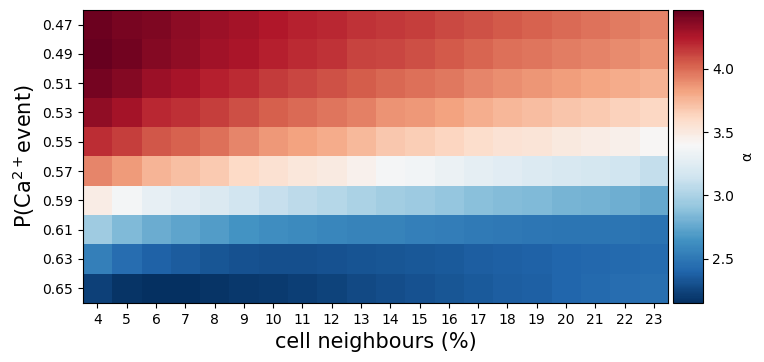

In [19]:
#EXPONENT
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))

divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'RdBu_r', norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.show()

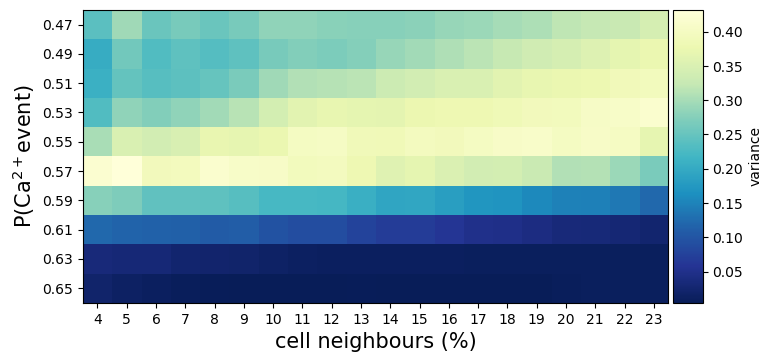

In [33]:
#VARIANCE
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))

#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(varvec.shape[0]/nnbs)
varav = varvec.reshape((bcls,nnbs))    
plot1 = ax.imshow(varav, cmap = 'YlGnBu_r')#, norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'variance')
plt.show()

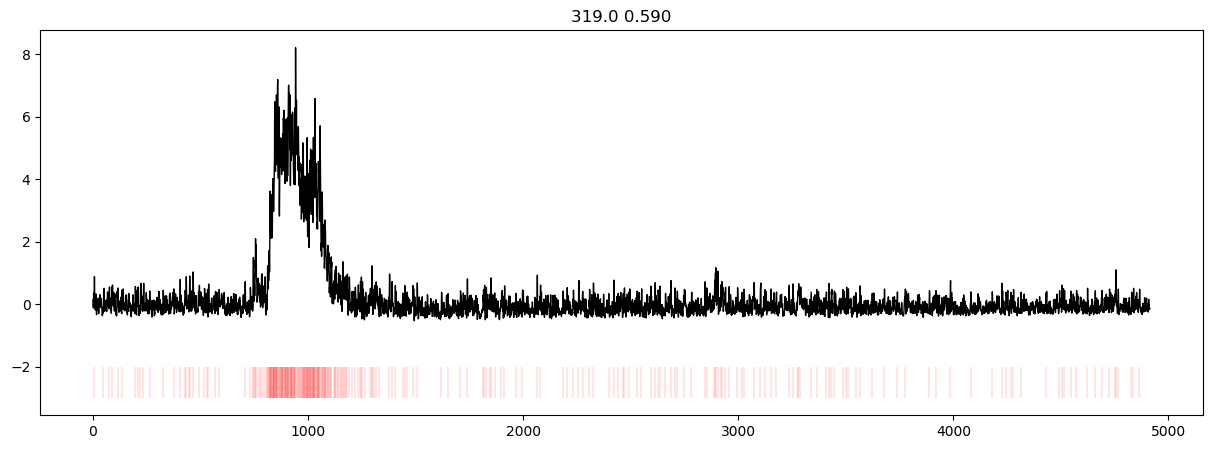

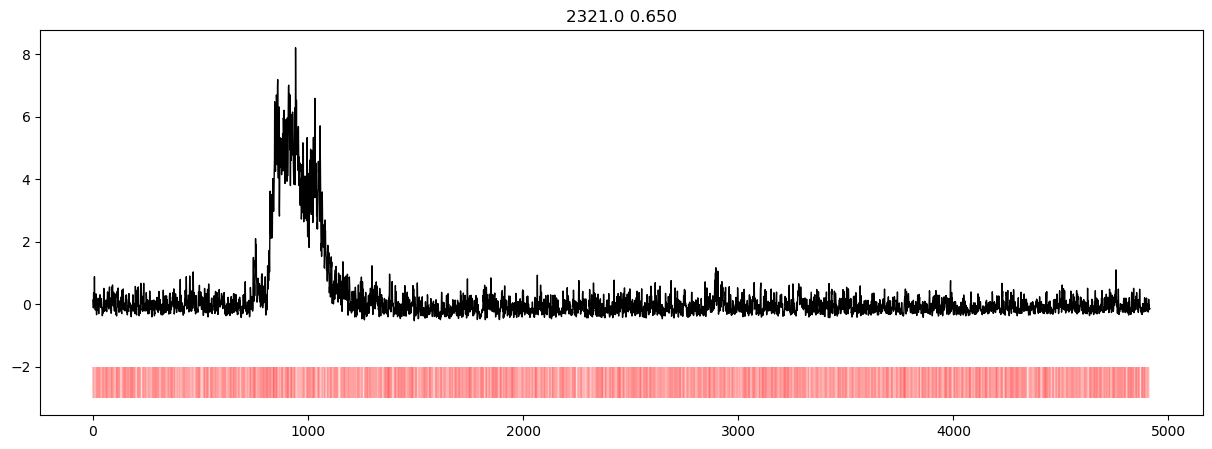

In [5]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 2

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c], color = 'k', linewidth = 1)
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c], color = 'k', linewidth = 1)
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))
plt.show()

#### Marginal likelihood map
* power law is invariant to parameters

* {calculate individual marginal likelihood values for each fish}
* {loglik ratio - sum marglikelihoods for each fish for power law and lognormal - overall ratio}

In [182]:
shape = (200)
mratio = np.zeros((shape))
for i in range(shape):
    powvec, logvec = 0,0
    for t in range(len(powlist)):
        if type(np.load(powlist[t], allow_pickle=True)[i]) is not int:
            powvec = powvec + np.load(powlist[t], allow_pickle = True)[i][1]
            logvec = logvec +  np.load(loglist[t], allow_pickle = True)[i][2]
    mratio[i] = powvec - logvec

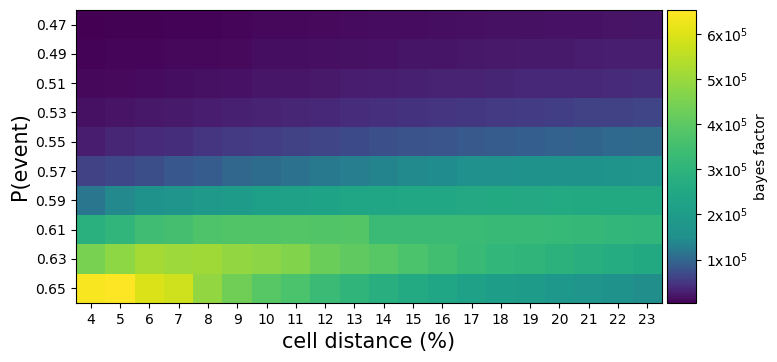

In [230]:
#MARGINAL LIKELIHOOD
from mpl_toolkits.axes_grid1 import make_axes_locatable
divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(mratio.shape[0]/nnbs)
margav = mratio.reshape((bcls,nnbs))    
plot1 = ax.imshow(margav, cmap = 'viridis', norm=divnorm)
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'bayes factor')
cbar0.ax.set_yticklabels(['1x10$^{5}$', '2x10$^{5}$', '3x10$^{5}$', '4x10$^{5}$', '5x10$^{5}$', '6x10$^{5}$'])  # vertically oriented colorbar
plt.show()

#### Branching ratio map
* branching ratio is close to critical value for all parameter values

In [ ]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
branchlist =  sorted(glob.glob('*-08*BLN*_branch.npy'))

In [35]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
    for i in range(len(branchlist)):
        b_sum[count,i] = np.load(branchlist[i])
    count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

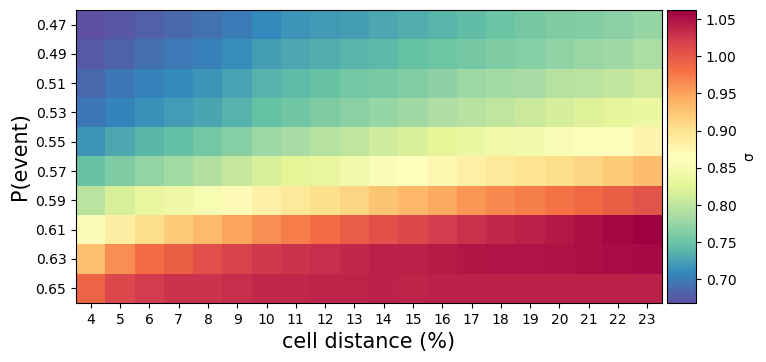

In [36]:
#BRANCHING RATIO
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean.reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r')
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
plt.show()

## PLOT2
### AVALANCHE SIZE, DURATION 
* avalanche size and duration distributions are log-linear

In [65]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
size_powlist = sorted(glob.glob('*BLN*size*_power*'))
dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

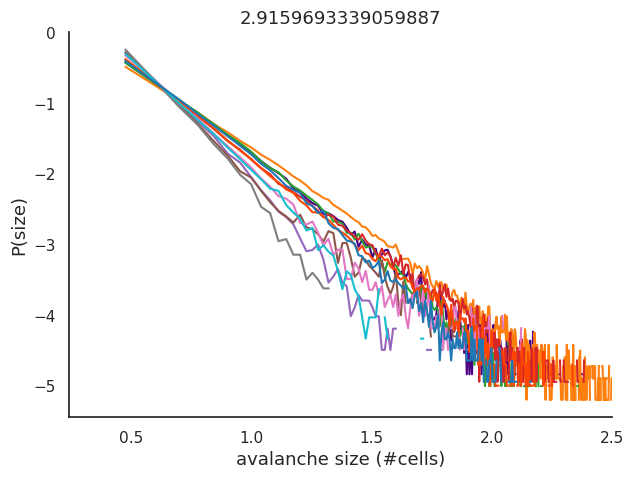

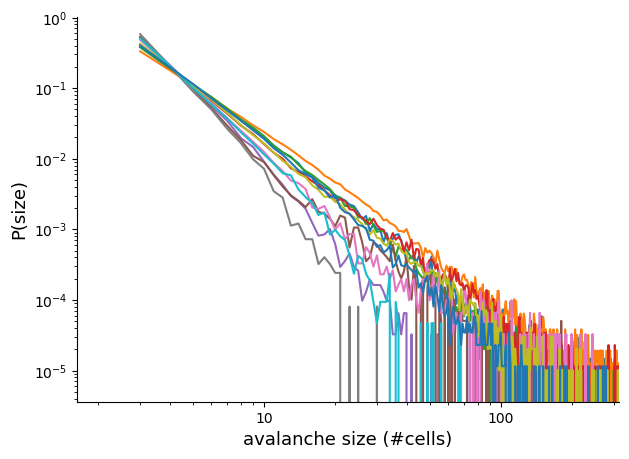

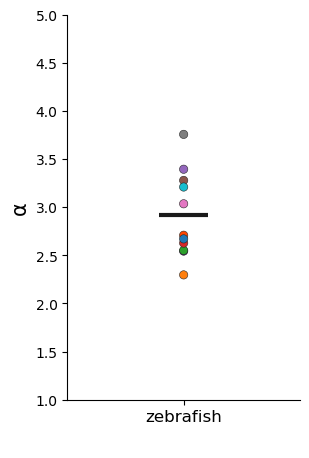

In [79]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
#EXPONENT CALCULATION - Baseline append
blnexp = []
for e in range(len(size_powlist)):
    blnexp = np.append(blnexp, np.load(size_powlist[e], allow_pickle=True)[0])
#Make fish name list
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": blnexp, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)


colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(blnexp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 2.5)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 316)  
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(1,5)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

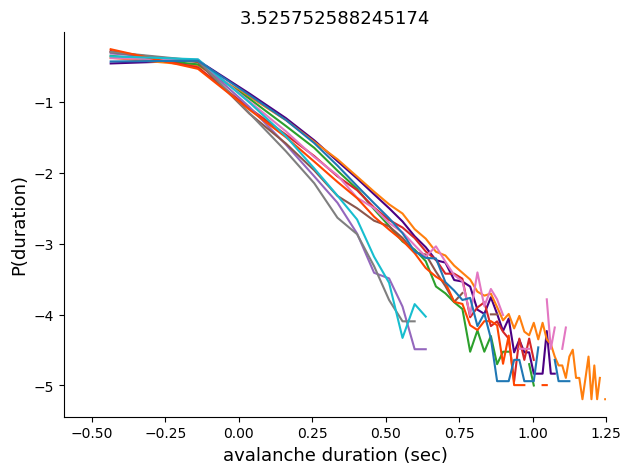

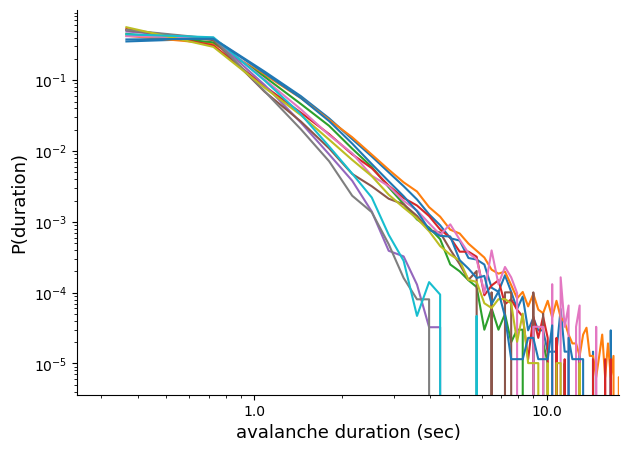

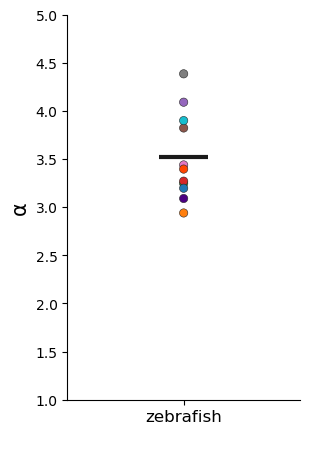

In [81]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sns.reset_orig()

#EXPONENT CALCULATION - Baseline append
blnexp = []
for e in range(len(dur_powlist)):
    blnexp = np.append(blnexp, np.load(dur_powlist[e], allow_pickle=True)[0])
#Make fish name list
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": blnexp, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)


binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(blnexp)), size = '13')
plt.xlim(right = 1.25)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 17.7)  
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(1,5)
plt.show()

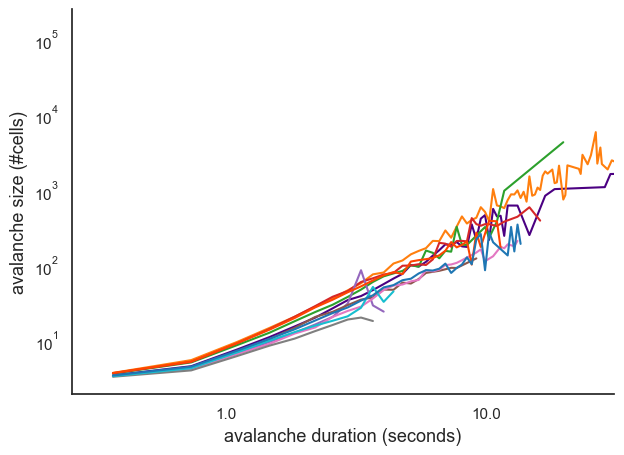

In [18]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('avalanche duration (seconds)', size = '13')
axarr.set_ylabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()

### Power law quantification
* duration and size of avalanches are better explained by power laws than lognormal

In [147]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
size_powlist = sorted(glob.glob('*BLN*size*_power*'))
size_loglist = sorted(glob.glob('*BLN*size*_log*'))
dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))
dur_loglist = sorted(glob.glob('*BLN*dur*_log*'))
size_powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_size_marglik_power.npy']

In [45]:
#LOGLIK RATIO
size_list, dur_list = np.zeros(11), np.zeros(11)
for i in range(len(size_powlist)):
    size_list[i] =  np.load(size_powlist[i],allow_pickle=True)[1] - np.load(size_loglist[i],allow_pickle=True)[2]
    dur_list[i] = np.load(dur_powlist[i],allow_pickle=True)[1] - np.load(dur_loglist[i],allow_pickle=True)[2]
fli = list(range(11))
for i in range(11):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":np.append(size_list, dur_list) ,"Fish": np.append(fli,fli), "Labels": np.append(adfn.repeat_list('Size', 11), adfn.repeat_list('Duration', 11))})

In [46]:
llr_df

,LLR,Fish,Labels
0,23061.326733,F2,Size
1,54545.912503,F3,Size
2,31390.922232,F4,Size
3,35509.482737,F5,Size
4,9608.178128,F6,Size
5,8328.779469,F7,Size
6,12412.135635,F8,Size
7,3285.834266,F9,Size
8,36994.106569,F10,Size
9,6334.606919,F11,Size


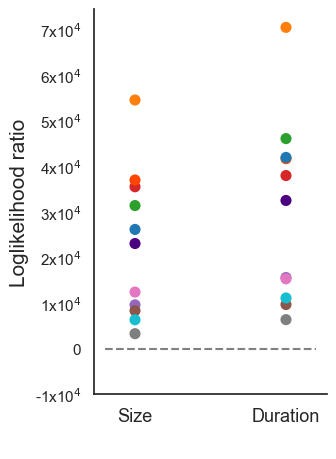

In [47]:
sns.set(style="white")
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 8, jitter = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Size', 'Duration'], size = 13)
plt.hlines(1, -0.2 ,1.2, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
plt.show()

### Connectivity-distance
* np.corrcoeff function for entire matrix 
* bin data on linear scale 
* ignore negative correlations
* exponent match theory

In [6]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('*BLN*cut*realtrace*')) 
coordlist = sorted(glob.glob('*BLN*realcoord*')) 
distlist = sorted(glob.glob('*BLN*dist.npy*')) 
binlist = sorted(glob.glob('*BLN*_corrdist*'))
binlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_corrdist_bins.npy']

In [ ]:
#Calculate euclidean distance
for e in range(len(coordlist)):
    euc_mat = crfn.euclidean_mat(np.load(coordlist[e]), [.5, .5, 15])
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, coordlist) + '_' + 'dist.npy', mat)
    print('Done fish #' + str(e))

In [ ]:
#Calculate corr-dist binning
for e in range(len(distlist)):
    corr = np.corrcoef(np.load(tracelist[e]))
    np.save(savepath + adfn.save_name(e,tracelist) + '_' + 'corr.npy', corr)
    corrdistbin = crfn.corrdis_bin(corr, np.load(distlist[e]), distlist[e], 200)
    np.save(savepath + adfn.save_name(e,distlist) + '_' + 'corrdist_bins.npy', corrdistbin)

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

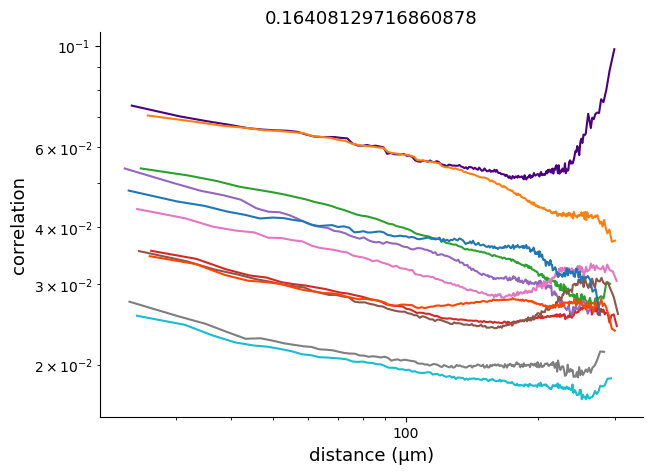

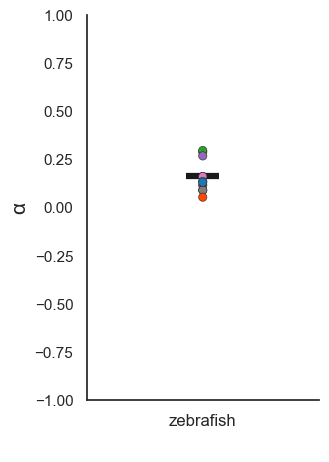

In [7]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = np.load(binlist[i])[0]
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.set_title(str(np.mean(slope)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(-1,1)
plt.show()

### PCA variance
* Baseline PCA variance plots - exponent calculation
* behaviour PCA variance

In [6]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
blnpcv

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_pcavar.npy']

In [ ]:
#Calculate entire trace PC-variance
blnpcv, p20pcv = list(range(len(blnraw))),list(range(len(p20raw)))
for e in range(len(blnraw)):
    b_data, p_data = np.load(blnraw[e]), np.load(p20raw[e])
    n_components = b_data.shape[1]
    b_pca, p_pca = decomposition.PCA(n_components) ,decomposition.PCA(n_components) #Define decomposition
    b_fit, p_fit = b_pca.fit(b_data) ,p_pca.fit(p_data) 
    blnpcv[e], p20pcv[e] = b_fit.explained_variance_ratio_, p_fit.explained_variance_ratio_
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, blnraw) + '_' + 'pcavar.npy', blnpcv[e])
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p20raw)  + '_' + 'pcavar.npy', p20pcv[e])
    print('Saved fish #' + str(e))

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

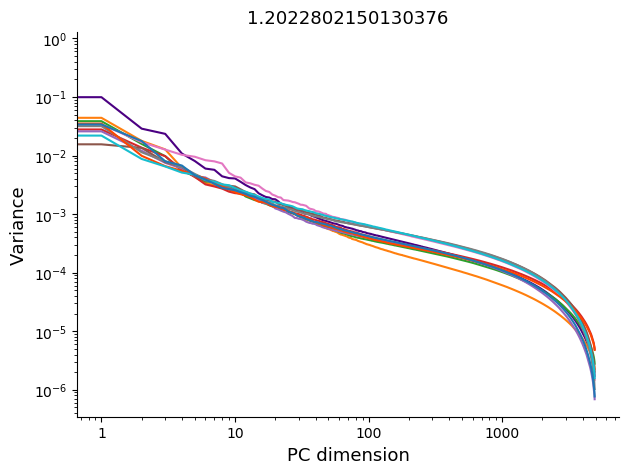

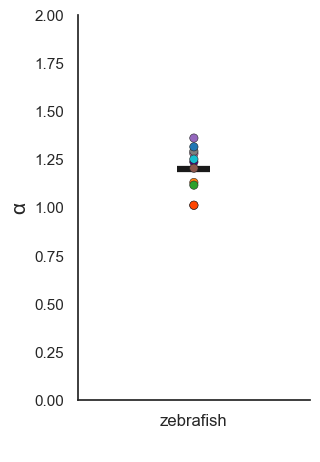

In [125]:
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
slope = list(range(len(blnpcv)))
for i in range(len(blnpcv)):
    xaxis = np.linspace(0,np.shape(np.load(blnpcv[i]))[0], num = np.shape(np.load(blnpcv[i]))[0]+1)
    yaxis = np.load(blnpcv[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(slope)), size = '13')
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(0,2)
plt.show()


### Branching ratio
* branching ratio is close to critical value (1)

In [118]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [119]:
import pandas as pd
all_list = [blnbranchlist]
blist = adfn.list_of_list(1,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

branchdic = {
  "branch ratio": blist[0], "condition": adfn.repeat_list('baseline',11), "Fish": fli}
branchdf = pd.DataFrame(branchdic)
branchdf

,branch ratio,condition,Fish
0,0.986667,baseline,F2
1,1.089033,baseline,F3
2,1.020179,baseline,F4
3,1.033049,baseline,F5
4,0.838542,baseline,F6
5,0.883468,baseline,F7
6,0.906975,baseline,F8
7,0.797831,baseline,F9
8,1.017794,baseline,F10
9,0.862305,baseline,F11


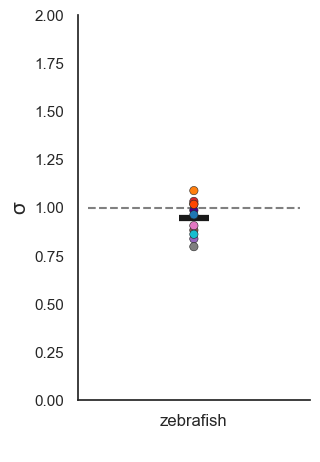

In [123]:
import matplotlib 
import seaborn as sns
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
#ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'black', linestyles = ["--"])
plt.hlines(np.mean(branchdf['branch ratio']), -0.007 ,0.007, linestyle = '-', color = 'k', lw=4.5)
plt.hlines(1, -0.05 ,0.05, linestyle = '--', color = 'grey')
ax.set_ylabel('σ', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
plt.ylim(0,2)
ax.legend_.remove()
plt.show()

### Baseline against nulls
* Null 1 - shuffle all - does a completely stochastic system generate avalanches?
* Null 2 - neighbour swap - is the spatial structure of cells important for generating critical avalanche dynamics?
* Null 3 - phase slide - is the temporal structure of cell firing important for generating critical avalanche dynamics?
* Null 4 - autocorrelation remove - is the signal memory of each active unit required for activity to spread? 

In [9]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
swaplist = sorted(glob.glob('*BLN*swap*'))
shufflelist = sorted(glob.glob('*BLN*shuff*'))
slidelist = sorted(glob.glob('*BLN*slide*'))
autolist = sorted(glob.glob('*BLN*auto*'))

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

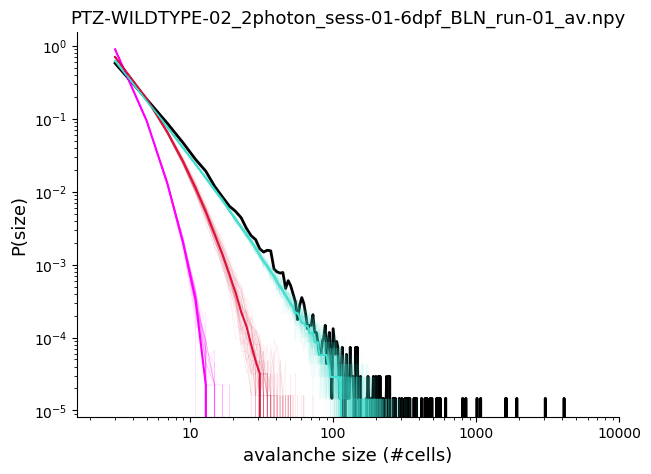

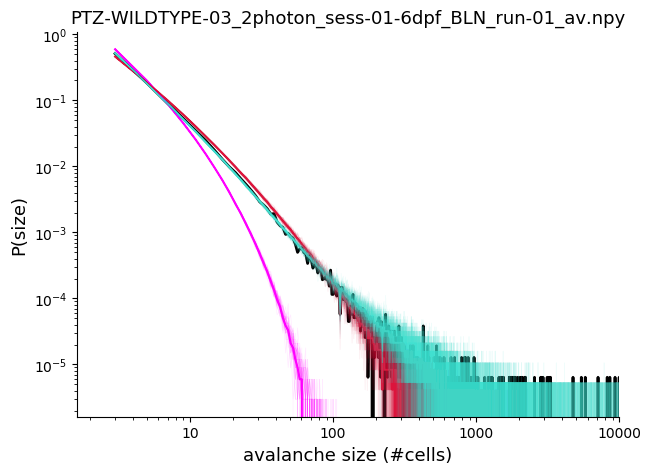

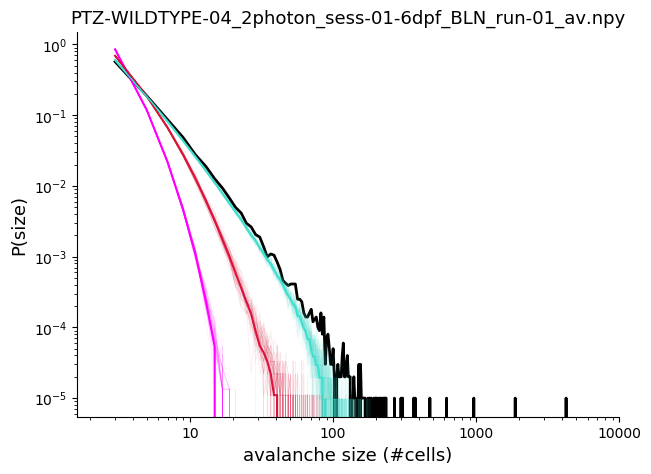

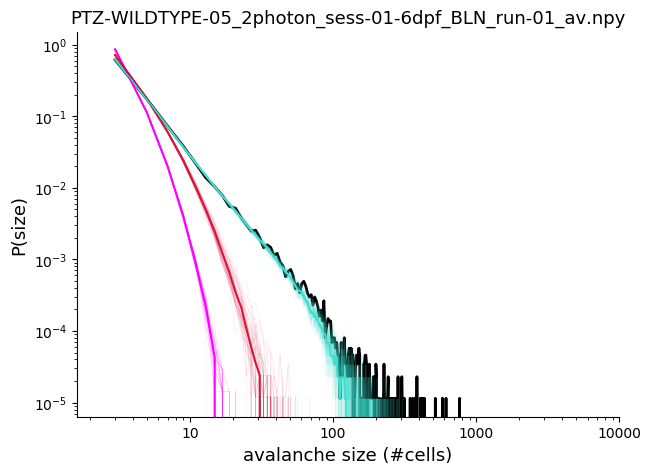

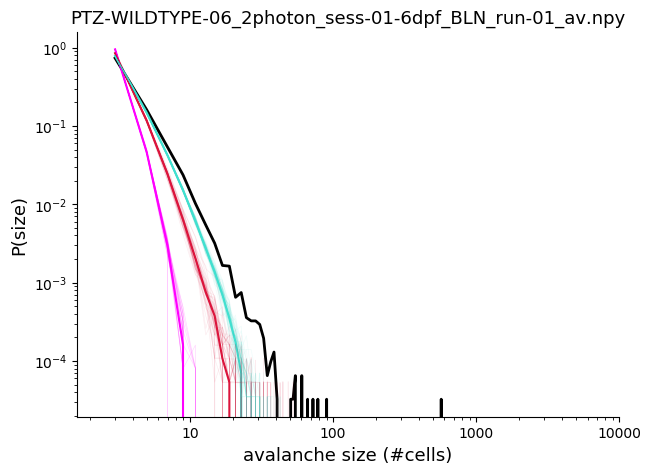

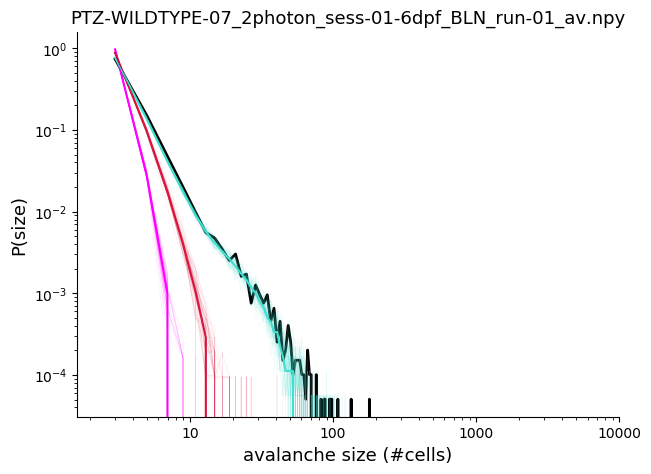

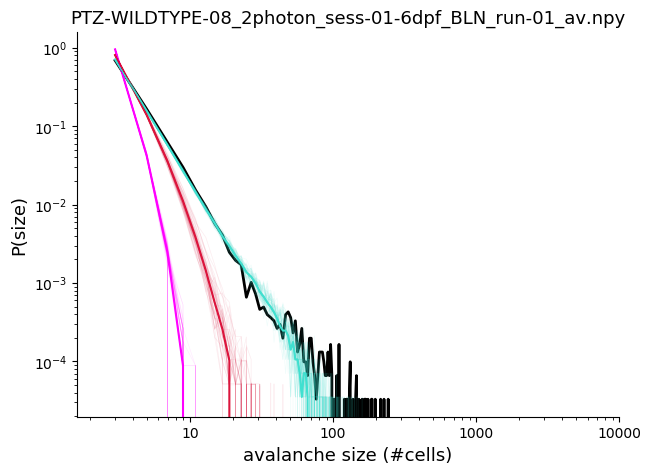

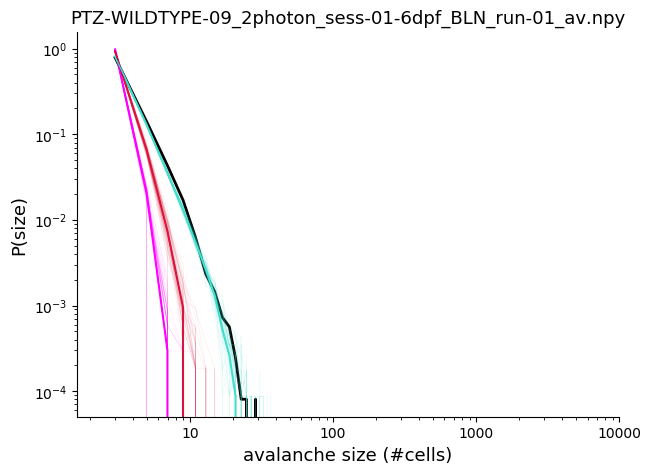

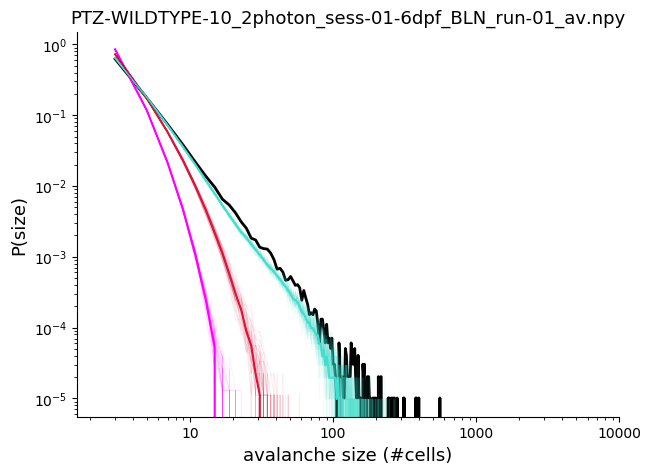

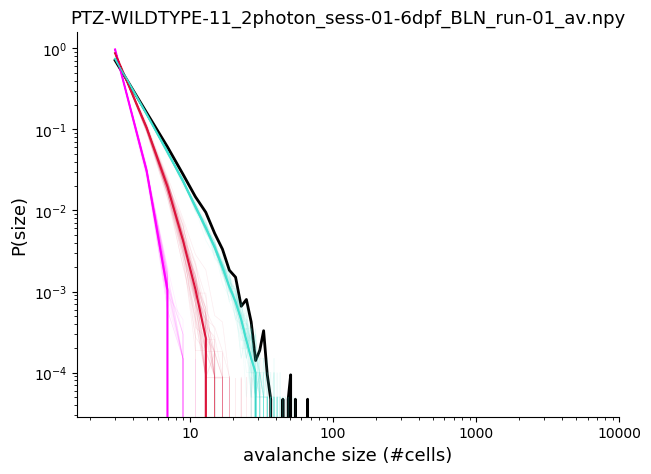

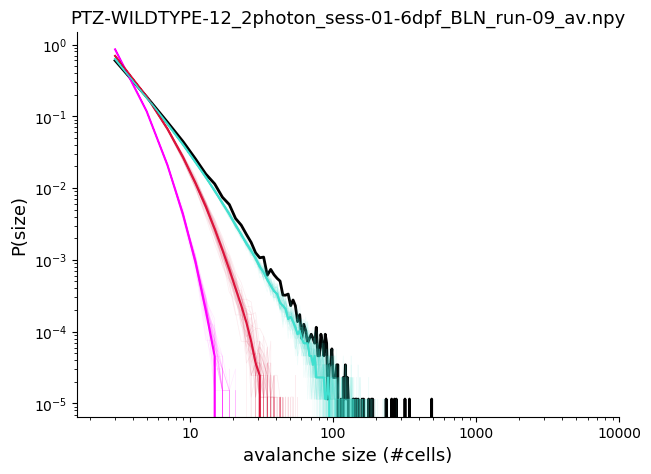

In [58]:
sns.reset_orig()
import matplotlib
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'magenta','crimson','turquoise']
nbins = 340000
choose=0
binvec = np.load(Fdrop + 'Project/' + experiment + os.sep + 'size_bln_null_combvec.npy')
maxi, mini = np.max(binvec), np.min(binvec)
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    swaplist = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
    shufflelist = sorted(glob.glob('*E-' + i + '*BLN*shuff*'))
    slidelist = sorted(glob.glob('*E-' + i + '*BLN*slide*'))
    autolist = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
    fig, axarr = plt.subplots(figsize = (7,5))
    
    shuffvec, swapvec, slidevec, autovec =[],[],[],[]
    veclist = [shuffvec, swapvec, autovec]
    nulist = [shufflelist, swaplist, autolist]
    avdistcut = np.load(blnlist[0])[choose]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, c = colors[0])
    for e in range(len(nulist)):
        mean_null = adfn.mean_distribution(nulist[e], choose)
        binned = np.linspace(mini,maxi,nbins)
        hist = np.histogram(mean_null, bins = binned)
        xaxis = hist[1][:-1]
        yaxis = hist[0]/np.sum(hist[0])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[e+1])
    for e in range(len(veclist)):
        for t in range(len(nulist[e])):
            binned = np.linspace(mini,maxi,nbins)
            hist = np.histogram(np.load(nulist[e][t])[0], bins = binned)
            xaxis = hist[1][:-1]
            yaxis = hist[0]/np.sum(hist[0])
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 1, alpha = 0.08, c = colors[e+1])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 10000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

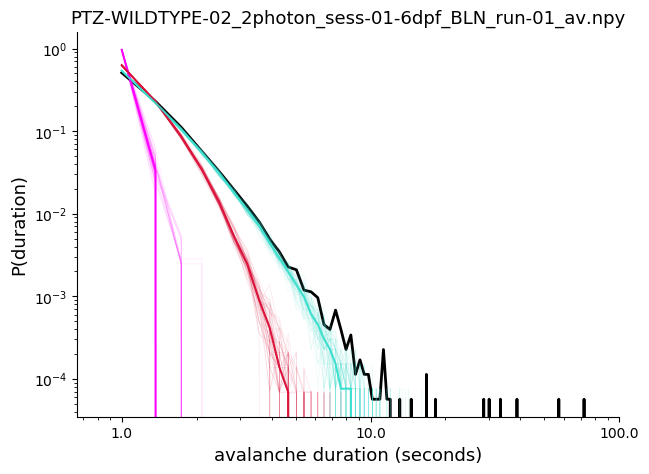

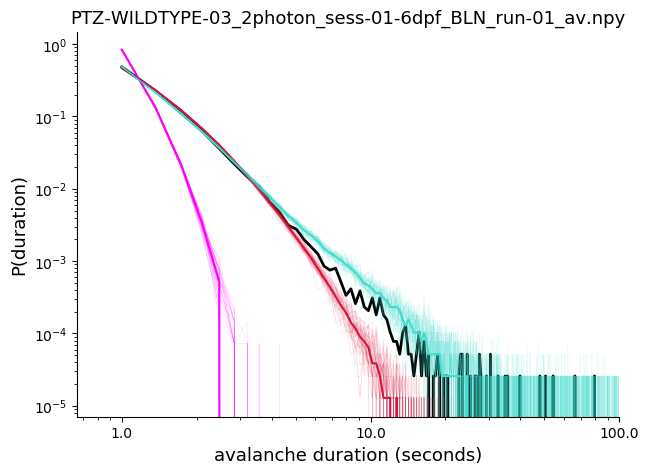

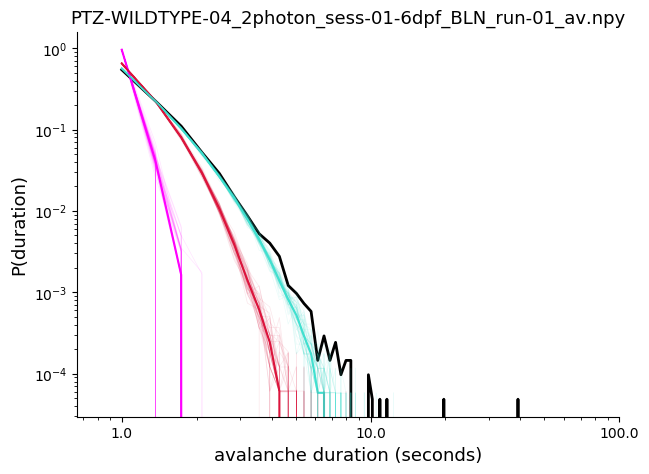

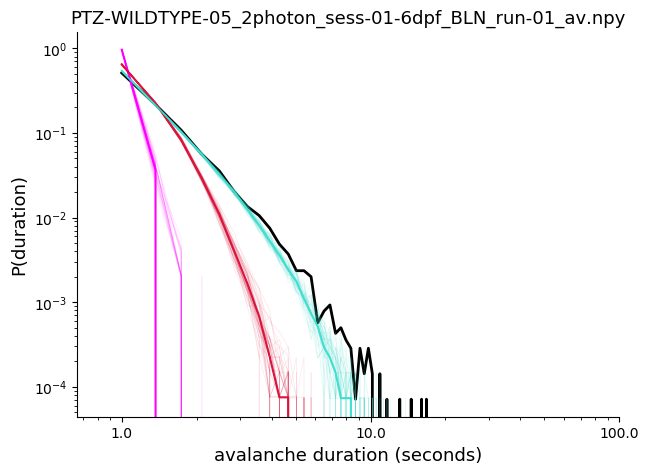

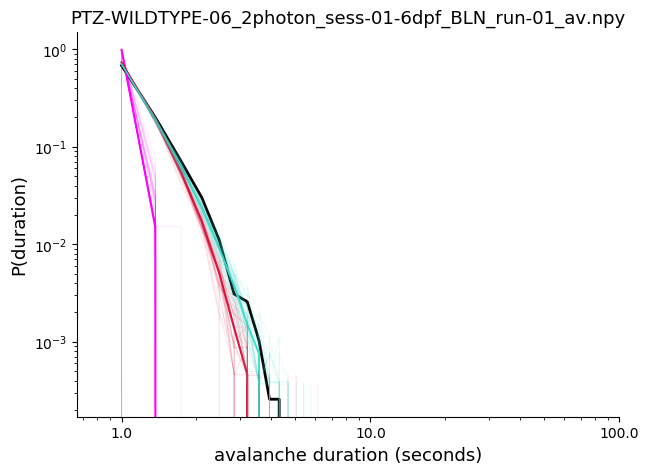

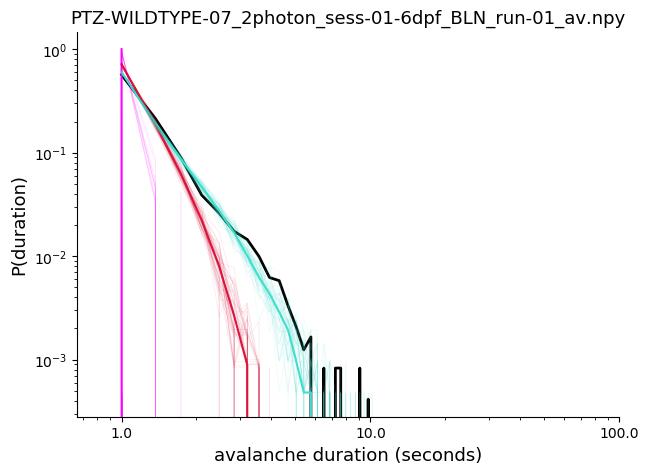

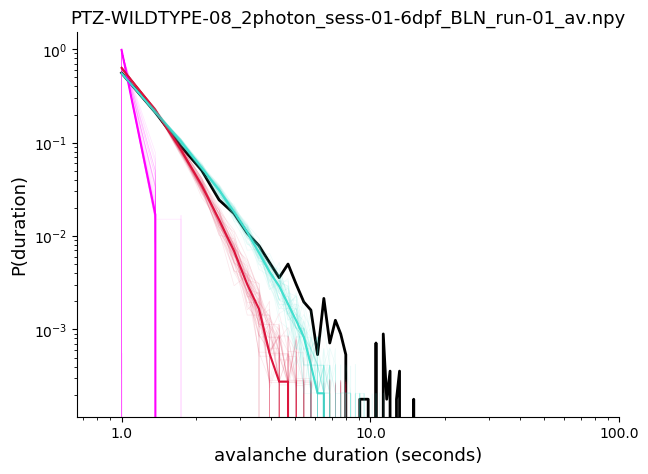

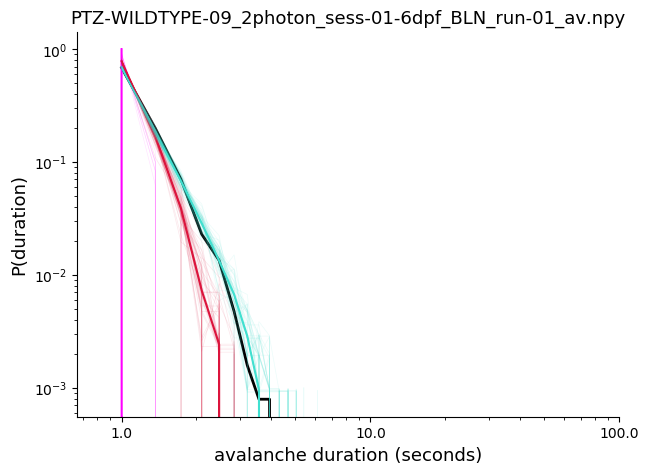

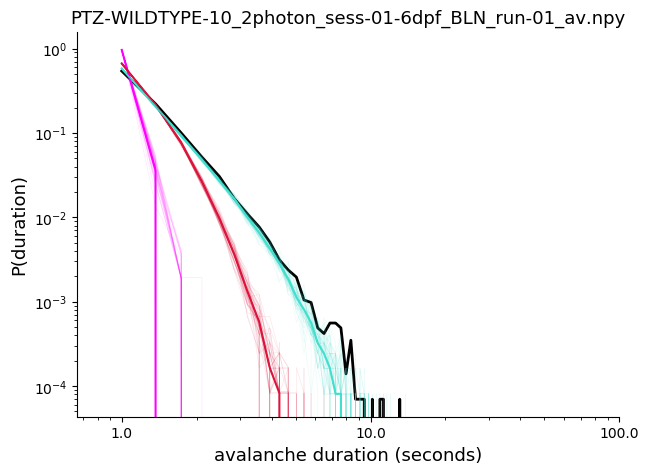

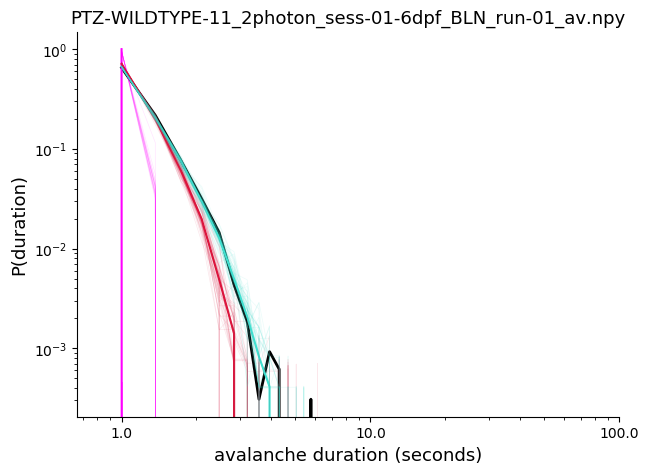

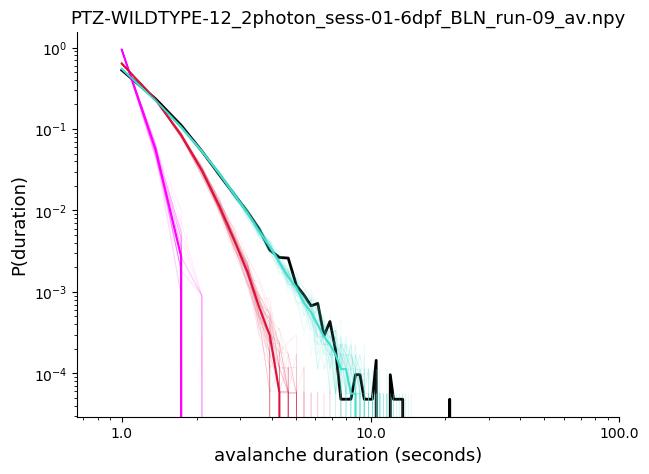

In [64]:
import matplotlib
sns.reset_orig()

num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'magenta','crimson','turquoise']
nbins = 11200
choose=1
dur_binvec = np.load(Fdrop + 'Project/' + experiment + os.sep + 'dur_bln_null_combvec.npy')
maxi, mini = np.max(dur_binvec), np.min(dur_binvec)
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    swaplist = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
    shufflelist = sorted(glob.glob('*E-' + i + '*BLN*shuff*'))
    slidelist = sorted(glob.glob('*E-' + i + '*BLN*slide*'))
    autolist = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
    fig, axarr = plt.subplots(figsize = (7,5))
    frameon=False
    shuffvec, swapvec, slidevec, autovec =[],[],[],[]
    veclist = [shuffvec, swapvec, autovec]
    nulist = [shufflelist, swaplist, autolist]
    avdistcut = (1/2.73)*np.load(blnlist[0])[choose]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, c = colors[0])
    for e in range(len(nulist)):
        mean_null = adfn.mean_distribution(nulist[e], choose)
        binned = np.linspace(mini,maxi,nbins)
        hist = np.histogram((1/2.73)*mean_null, bins = binned)
        xaxis = hist[1][:-1]
        yaxis = hist[0]/np.sum(hist[0])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[e+1])
    for e in range(len(nulist)):
        for t in range(len(nulist[e])):
            binned = np.linspace(mini,maxi,nbins)
            hist = np.histogram((1/2.73)*np.load(nulist[e][t])[1], bins = binned)
            xaxis = hist[1][:-1]
            yaxis = hist[0]/np.sum(hist[0])
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 1, alpha = 0.1, c = colors[e+1])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 100)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

### ks distance
* Which null distributions are more important to generate critical avalanche dynamics
* Size - spatial structure more important than temporal structure & autocorrelation - time structure still important
* Duration - spatial structure and temporal structure equally important 

* {for each fish - generate an average distribution, find ks distance of each point to that distribution}
* {for each baseline, quantify how far the baseline deviaties from that value - plot that ks distance (significant if > 1.96 sd from null mean)}


In [36]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
size_powlist = sorted(glob.glob('*BLN*size*_power*'))
size_loglist = sorted(glob.glob('*BLN*size*_log*'))
dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))
dur_loglist = sorted(glob.glob('*BLN*dur*_log*'))
size_powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_size_marglik_power.npy']

In [145]:
#SIZE - BASELINE MARGINAL LIKELIHOODS
count=0
choose = 0
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*BLN*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_size_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_size_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09


In [146]:
#DUR - BASELINE MARGINAL LIKELIHOODS
count=0
choose = 1
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*BLN*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_dur_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_dur_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09


In [46]:
#EXP - average exponent for each null
from scipy import stats
ks_list = adfn.list_of_list(22,4)
nullexp_list = adfn.list_of_list(22,4)
mode = [0,1]
count=0
num1 = adfn.name_zero('front', 2, 12, 1)
for y in range(2):
    for i in num1:
        os.chdir(Fdrop + 'Project/' + experiment)
        bln = np.load(sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))[0])
        swaplist = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
        shufflelist = sorted(glob.glob('*E-' + i + '*BLN*shuff*'))
        autolist = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
        slidelist = sorted(glob.glob('*E-' + i + '*BLN*slide*'))
        null_list = [shufflelist, swaplist,autolist]
        for f in range(len(null_list)):
            mean_null = adfn.mean_distribution(null_list[f], mode[y])
            ks_list[count][f] = crfn.ks_compare(null_list[f], mean_null, bln, mode[y], len(null_list[f]))
            if mode[y] == 0:
                data = mean_null
                sizes=data
                M=len(sizes)
                a=min(sizes) #define xmin
                b=max(sizes) #define xmax
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=isfn.IS_LN(npart, sizes, M, a, b)
                po=isfn.IS(npart, sizes,M, a, b)
                nullexp_list[count][f] = po[0]
            if mode[y] == 1:
                data = mean_null
                sizes=data
                a=2 #define xmin
                b=max(sizes) #define xmax
                M=len(sizes[np.where(sizes>a-1)])
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=isfn.IS_LN(npart, sizes,M, a, b)
                po=isfn.IS(npart, sizes, M, a, b)
                nullexp_list[count][f] = po[0]
        count+=1
        print('Done fish ' + str(i))

Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12
Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12


In [50]:
#KS distance
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
    
#Null append
sizeks, durks, lab = [],[],[]
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle']
for e in range(len(nulist)):
    for f in range(11):
        sizeks = np.append(sizeks, ks_list[f][e][0])
        durks =  np.append(durks, ks_list[f+11][e][0])
        lab = np.append(lab, nulist[e])

sksdf = pd.DataFrame({ "KS distance": sizeks, "Labels": lab, 'Fish': flist})
dksdf = pd.DataFrame({ "KS distance": durks, "Labels": lab, 'Fish': flist})

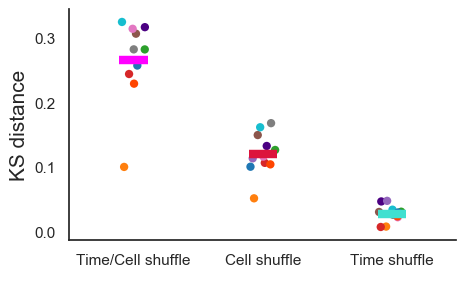

In [61]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise']
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.pointplot(x="Labels", y="KS distance", data=sksdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.stripplot(x="Labels", y="KS distance", data=sksdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [76]:
adfn.ttest(sksdf, 'Labels', 'KS distance', ['Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='multiple')

[[[nan,
   nan,
   0.016666666666666666,
   'Not significant',
   'Time + Cell shuffle - Time + Cell shuffle'],
  [12.07337924876399,
   2.7585739407690425e-07,
   0.016666666666666666,
   'Significant',
   'Time + Cell shuffle - Cell shuffle'],
  [14.025492999097443,
   6.655639175687905e-08,
   0.016666666666666666,
   'Significant',
   'Time + Cell shuffle - Time shuffle']],
 [[-12.07337924876399,
   2.7585739407690425e-07,
   0.016666666666666666,
   'Significant',
   'Cell shuffle - Time + Cell shuffle'],
  [nan,
   nan,
   0.016666666666666666,
   'Not significant',
   'Cell shuffle - Cell shuffle'],
  [10.793231486610905,
   7.862759560859407e-07,
   0.016666666666666666,
   'Significant',
   'Cell shuffle - Time shuffle']],
 [[-14.025492999097443,
   6.655639175687905e-08,
   0.016666666666666666,
   'Significant',
   'Time shuffle - Time + Cell shuffle'],
  [-10.793231486610905,
   7.862759560859407e-07,
   0.016666666666666666,
   'Significant',
   'Time shuffle - Cell shuffl

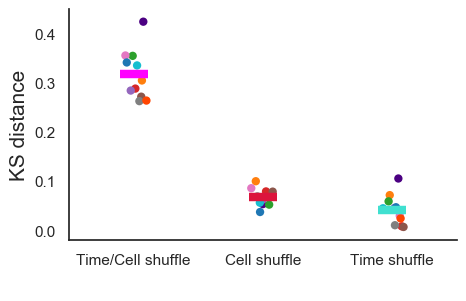

In [74]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise']
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.pointplot(x="Labels", y="KS distance", data=dksdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.stripplot(x="Labels", y="KS distance", data=dksdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [77]:
adfn.ttest(dksdf, 'Labels', 'KS distance', ['Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='multiple')

[[[nan,
   nan,
   0.016666666666666666,
   'Not significant',
   'Time + Cell shuffle - Time + Cell shuffle'],
  [13.927076810940068,
   7.11877623438902e-08,
   0.016666666666666666,
   'Significant',
   'Time + Cell shuffle - Cell shuffle'],
  [28.232405882267113,
   7.224407727252084e-11,
   0.016666666666666666,
   'Significant',
   'Time + Cell shuffle - Time shuffle']],
 [[-13.927076810940068,
   7.11877623438902e-08,
   0.016666666666666666,
   'Significant',
   'Cell shuffle - Time + Cell shuffle'],
  [nan,
   nan,
   0.016666666666666666,
   'Not significant',
   'Cell shuffle - Cell shuffle'],
  [2.242017956365393,
   0.04883674938900227,
   0.016666666666666666,
   'Not significant',
   'Cell shuffle - Time shuffle']],
 [[-28.232405882267113,
   7.224407727252084e-11,
   0.016666666666666666,
   'Significant',
   'Time shuffle - Time + Cell shuffle'],
  [-2.242017956365393,
   0.04883674938900227,
   0.016666666666666666,
   'Not significant',
   'Time shuffle - Cell shuffl

### EXPONENT

* which null distributions increase/decrease avalanche number?
* Cell location and time structure reduces avalanche size/duration, autocorrelation does not

In [69]:
#EXPONENT CALCULATION - Baseline append
blnexp, blnlab = [],[]
blnlist = [size_powlist, dur_powlist]
for i in range(len(blnlist)):
    for e in range(len(blnlist[i])):
        blnexp = np.append(blnexp, np.load(blnlist[i][e], allow_pickle=True)[0])
blnlab = adfn.repeat_list('Baseline', 22)

#Make fish name list
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(4):
    flist = np.append(flist, fli)
    
#Null append
sizex, durx, lab = [],[],[]
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle']
for e in range(len(nulist)):
    for f in range(11):
        sizex = np.append(sizex, nullexp_list[f][e])
        durx =  np.append(durx, nullexp_list[f+11][e])
        lab = np.append(lab, nulist[e])

#Append together 
labcomb = np.append(lab,blnlab[:11])            
sizecomb = np.append(sizex,blnexp[:11])
durcomb = np.append(durx,blnexp[11:])

sxdf = pd.DataFrame({ "Exponent": sizecomb, "Labels": labcomb, 'Fish': flist})
dxdf = pd.DataFrame({ "Exponent": durcomb, "Labels": labcomb, 'Fish': flist})

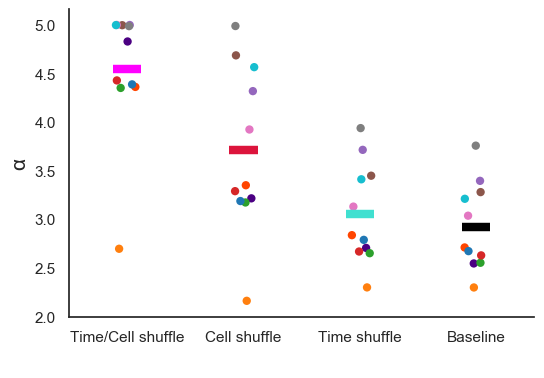

In [72]:
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise', 'black']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data=sxdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="Exponent", data=sxdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Baseline'], size = 11)
ax.legend_.remove()
plt.show()

In [80]:
adfn.ttest(sxdf, 'Labels', 'Exponent', ['Baseline','Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='single')

[[-11.249865430761567,
  5.347902924357404e-07,
  0.016666666666666666,
  'Significant',
  'Baseline - Time + Cell shuffle'],
 [-6.007710008786156,
  0.0001307580696798783,
  0.016666666666666666,
  'Significant',
  'Baseline - Cell shuffle'],
 [-5.3225151095191965,
  0.00033653671789046356,
  0.016666666666666666,
  'Significant',
  'Baseline - Time shuffle']]

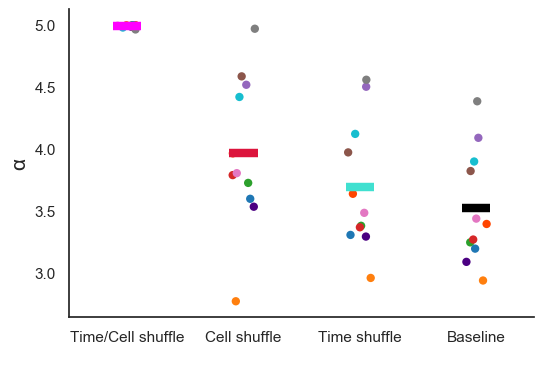

In [73]:
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise', 'black']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data=dxdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="Exponent", data=dxdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Baseline'], size = 11)
ax.legend_.remove()
plt.show()

In [81]:
adfn.ttest(dxdf, 'Labels', 'Exponent', ['Baseline','Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='single')

[[-10.42748235188909,
  1.0816398583192024e-06,
  0.016666666666666666,
  'Significant',
  'Baseline - Time + Cell shuffle'],
 [-6.417900183344986,
  7.65514016324283e-05,
  0.016666666666666666,
  'Significant',
  'Baseline - Cell shuffle'],
 [-5.097527895492463,
  0.00046570442506185366,
  0.016666666666666666,
  'Significant',
  'Baseline - Time shuffle']]

In [151]:
#KS + EXP
from scipy import stats
ks_list = adfn.list_of_list(22,4)
nullexp_list, nullratio_list = adfn.list_of_list(22,4),adfn.list_of_list(22,4)
mode = [0,1]
count=0
for y in range(2):
    for i in num1:
        os.chdir(Fdrop + 'Project/' + experiment)
        bln = np.load(sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))[0])
        swaplist = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
        shufflelist = sorted(glob.glob('*E-' + i + '*BLN*shuff*'))
        autolist = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
        slidelist = sorted(glob.glob('*E-' + i + '*BLN*slide*'))
        null_list = [shufflelist, swaplist,autolist,slidelist]
        for f in range(len(null_list)):
            mean_null = mean_distribution(null_list[f], mode[y])
            ks_list[count][f] = ks_compare(null_list[f], mean_null, bln, mode[y], len(null_list[f]))
            if mode[y] == 0:
                data = mean_null
                sizes=data
                M=len(sizes)
                a=min(sizes) #define xmin
                b=max(sizes) #define xmax
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=IS_LN(npart)
                po=IS(npart)
                nullexp_list[count][f] = po[0]
                nullratio_list[count][f] = po[1]-ln[2]
            if mode[y] == 1:
                data = mean_null
                sizes=data
                a=2 #define xmin
                b=max(sizes) #define xmax
                M=len(sizes[np.where(sizes>a-1)])
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=IS_LN(npart)
                po=IS(npart)
                nullexp_list[count][f] = po[0]
                nullratio_list[count][f] = po[1]-ln[2]
        count+=1
        print('Done fish ' + str(i))

Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12
Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12


In [152]:
#DATA FRAME
import pandas as pd
null_labels = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle', 'Time permute']
ks_bynull = adfn.list_of_list(4,0)
blnexp_list = list(range(11))
ks_stack,p_stack,label_stack, expdiff_stack = [],[],[],[]
size_ks_df = {}
for i in range(len(null_labels)):
    for t in range(11):
        ks_stack = np.append(ks_stack, ks_list[t][i][0])
        p_stack = np.append(p_stack, ks_list[t][i][1])
        label_stack = np.append(label_stack, null_labels[i])
        blnexp_list[t] = np.load(size_powlist[t],allow_pickle=True)[0]
        expdiff_stack = np.append(expdiff_stack, (nullexp_list[t][i] - blnexp_list[t])) 
size_ks_df = pd.DataFrame({"KS distance":ks_stack , "p-value": p_stack, "Exponent change": expdiff_stack, "Labels": label_stack})

ks_stack,p_stack,label_stack, expdiff_stack = [],[],[],[]
for i in range(len(null_labels)):
    for t in range(11):
        ks_stack = np.append(ks_stack, ks_list[t+11][i][0])
        p_stack = np.append(p_stack, ks_list[t+11][i][1])
        label_stack = np.append(label_stack, null_labels[i])
        blnexp_list[t] = np.load(dur_powlist[t],allow_pickle=True)[0]
        expdiff_stack = np.append(expdiff_stack, (nullexp_list[t+11][i] - blnexp_list[t])) 
dur_ks_df = pd.DataFrame({"KS distance":ks_stack , "p-value": p_stack, "Exponent change": expdiff_stack, "Labels": label_stack})


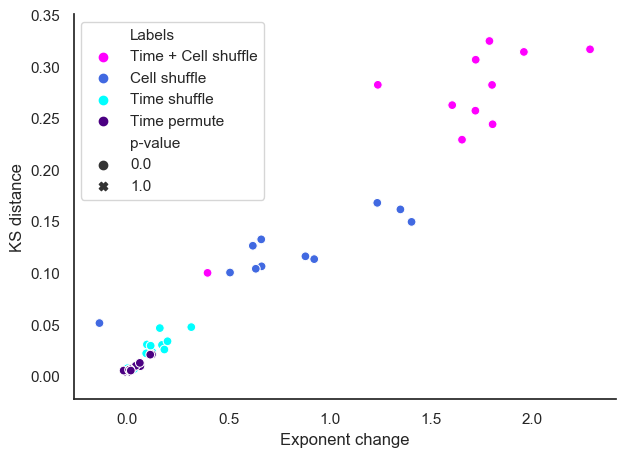

In [153]:
sns.set(style="white")
colors = ['black', 'magenta','royalblue','cyan', 'indigo']
colors2 = ['black', 'black', 'black', 'black']
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.scatterplot(x="Exponent change", y="KS distance",data=size_ks_df, hue='Labels', style = 'p-value', palette = colors[1:], alpha =1, s=40)
#ax = sns.pointplot(x="Labels", y="KS distance",data=ks_df[:44],  palette = colors[1:], ci = "sd")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

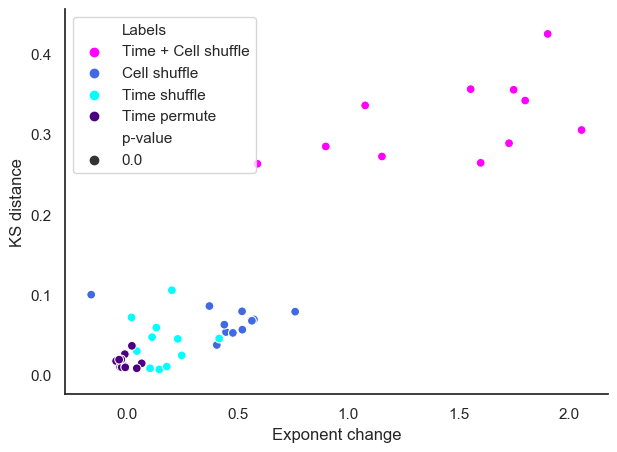

In [154]:
sns.set(style="white")
colors = ['black', 'magenta','royalblue','cyan', 'indigo']
colors2 = ['black', 'black', 'black', 'black']
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.scatterplot(x="Exponent change", y="KS distance",data = dur_ks_df, hue='Labels', style = 'p-value', palette = colors[1:], alpha =1, s=40)
#ax = sns.pointplot(x="Labels", y="KS distance",data=ks_df[:44],  palette = colors[1:], ci = "sd")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylim(0, 0.46)
plt.show()

### Supplementary figure
* show different distributions and different calcium traces for different p firing values

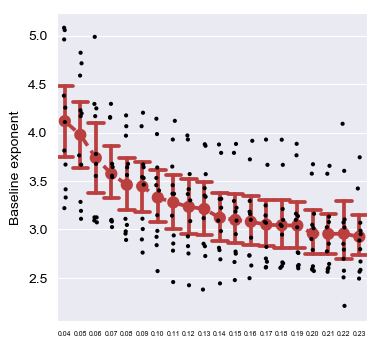

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,3.330189,3.192075,3.073522,3.091692,2.980623,3.004504,2.924068,2.855203,2.828273,2.827171,2.811037,2.771949,2.732998,2.700471,2.621566,2.622505,2.585966,2.563629,2.505816,2.493371
1,4.108521,3.284678,3.092541,3.024534,2.892172,2.761703,2.570676,2.457638,2.424426,2.380127,2.443589,2.477949,2.497357,2.607700,2.660650,2.757387,2.571564,2.774460,2.851707,2.886415
2,4.961027,4.588278,4.249756,4.159743,3.968024,3.541113,3.531675,3.368196,3.300438,3.426315,2.983073,2.951543,2.915695,2.820187,2.946814,2.764346,2.789538,2.644616,2.696933,2.669430
3,4.380755,4.198508,3.779434,3.540361,2.957162,2.897250,2.838223,2.781660,2.752495,2.726219,2.692026,2.664311,2.628392,2.612776,2.604084,2.599279,2.595195,2.589782,2.211765,2.583309
4,5.081731,4.824003,4.295500,4.296331,4.177132,4.204933,4.142704,4.121251,3.970423,3.879521,3.876850,3.882975,3.915220,3.927856,3.926307,3.884064,3.673284,3.656910,3.605121,3.423019
5,3.669991,3.668656,3.677654,3.677172,3.676324,3.462948,3.401957,3.368806,3.365630,3.350398,3.313744,3.294393,3.294392,3.248105,3.211956,3.163052,3.162494,3.133032,3.103254,3.069613
6,3.220217,3.110052,3.124772,3.098543,3.109892,3.111128,3.147007,3.142835,3.086385,3.116340,3.091803,3.091843,3.100483,3.068947,3.050754,3.138303,3.013070,3.076941,3.072469,2.952572
7,4.257538,4.169371,4.169371,4.153567,4.065803,4.065486,3.984577,3.928429,3.928631,3.863832,3.790678,3.790883,3.723394,3.667089,3.667047,3.765364,3.576154,3.575116,4.090819,3.744958
8,3.414384,4.229230,3.125310,3.082383,3.046880,3.670820,2.985726,2.938705,2.928170,2.852653,2.787009,2.750714,2.731007,2.667225,2.650926,2.633953,2.619980,2.603681,2.574422,2.564285
9,5.057620,4.714915,4.987820,3.644640,3.639866,3.531227,3.457590,3.456897,3.415301,3.337540,3.224371,3.224270,3.183716,3.145053,3.098917,3.099092,3.047764,3.022333,3.020897,2.986908


In [54]:
pltfn.boxplot(avdic, 'Baseline exponent', (4,4), 10, 5, 3, 1)

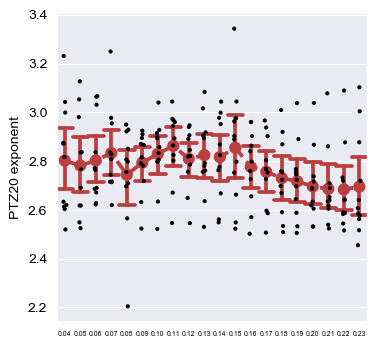

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,3.230633,3.126942,3.065945,2.954705,2.921859,2.894846,2.893423,2.824796,2.820950,2.761393,2.561031,2.522836,2.570544,2.596678,2.534072,2.532940,2.532136,2.539486,2.544179,2.576816
1,2.633585,2.691255,2.690007,2.619656,2.204847,2.523651,2.521972,2.546420,2.545710,2.530532,2.549051,2.548615,2.502364,2.506971,2.508940,2.505258,2.531519,2.523847,2.515952,2.516779
2,2.613536,2.525051,2.686236,2.808633,2.806511,2.866413,2.899626,2.967202,2.946518,2.917792,2.867900,2.888973,2.840432,2.803804,2.723705,2.723850,2.687038,2.639487,2.640675,2.640441
3,3.042612,3.053036,3.063992,3.249315,2.949797,2.870447,2.833011,2.973207,2.845560,2.756107,2.825085,2.662526,2.655385,2.586593,2.590657,2.588268,2.605060,2.604767,2.587652,2.607115
4,2.871567,2.836766,2.836382,2.835528,2.850622,2.815461,2.806021,2.802506,2.756566,2.780744,2.775616,2.752892,2.726613,2.727082,2.697982,2.643970,2.618400,2.617504,2.583013,2.585524
5,2.519716,2.549063,2.627842,2.715105,2.798079,2.910081,2.927660,2.944145,2.905880,2.904395,2.951578,2.902741,2.960442,2.937716,2.919673,2.890296,2.867167,2.860783,2.876883,2.877195
6,2.874738,2.767232,2.764496,2.713992,2.708794,2.718305,3.040092,3.044120,2.785931,3.083608,2.998670,3.342940,2.797998,2.753535,2.669580,2.696465,2.690145,2.689205,2.732900,3.004113
7,2.620199,2.617540,2.622151,2.716257,2.696669,2.791183,2.797864,2.959757,2.939923,3.016058,3.043744,3.044288,2.959398,2.966715,3.009610,3.037854,3.038660,3.077678,3.089495,3.102562
8,2.603666,2.618572,2.671386,2.743782,2.755217,2.781631,2.857819,2.864306,2.818422,2.791777,2.762915,2.797667,2.759805,2.767009,2.758317,2.767406,2.716168,2.652519,2.642409,2.455306
9,2.999078,2.980425,3.031096,2.977259,2.928859,2.924664,2.914891,2.893361,2.891043,2.894380,2.977597,2.975750,2.863409,2.768436,2.753944,2.754478,2.737640,2.709070,2.719734,2.718877


In [55]:
pltfn.boxplot(pavdic, 'PTZ20 exponent', (4,4), 10, 5, 3, 1)

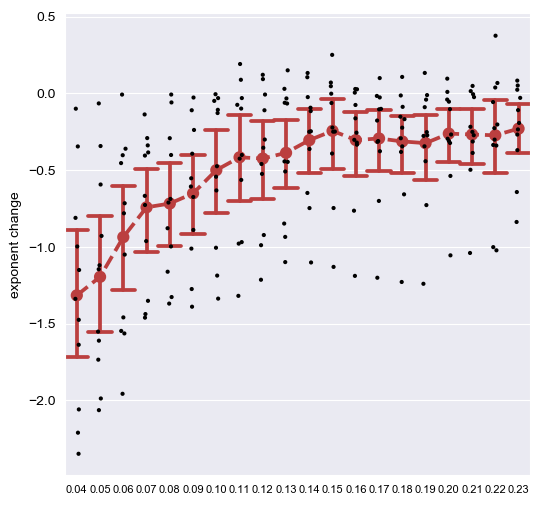

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,-0.099556,-0.065133,-0.007577,-0.136988,-0.058764,-0.109658,-0.030645,-0.030407,-0.007323,-0.065778,-0.250005,-0.249113,-0.162454,-0.103793,-0.087494,-0.089564,-0.053830,-0.024143,0.038363,0.083446
1,-1.474936,-0.593423,-0.402535,-0.404878,-0.687325,-0.238051,-0.048704,0.088782,0.121284,0.150405,0.105462,0.070666,0.005007,-0.100729,-0.151709,-0.252128,-0.040045,-0.250612,-0.335754,-0.369636
2,-2.347491,-2.063228,-1.563520,-1.351110,-1.161513,-0.674700,-0.632050,-0.400994,-0.353920,-0.508522,-0.115173,-0.062570,-0.075263,-0.016383,-0.223109,-0.040496,-0.102500,-0.005129,-0.056258,-0.028988
3,-1.338143,-1.145472,-0.715442,-0.291046,-0.007365,-0.026803,-0.005212,0.191548,0.093065,0.029888,0.133060,-0.001785,0.026994,-0.026183,-0.013426,-0.011012,0.009866,0.014985,0.375887,0.023805
4,-2.210164,-1.987237,-1.459118,-1.460804,-1.326510,-1.389471,-1.336683,-1.318745,-1.213857,-1.098777,-1.101234,-1.130082,-1.188607,-1.200773,-1.228324,-1.240095,-1.054884,-1.039406,-1.022108,-0.837495
5,-1.150275,-1.119593,-1.049812,-0.962068,-0.878245,-0.552867,-0.474298,-0.424661,-0.459750,-0.446004,-0.362167,-0.391653,-0.333950,-0.310389,-0.292283,-0.272756,-0.295327,-0.272249,-0.226370,-0.192418
6,-0.345479,-0.342819,-0.360276,-0.384551,-0.401098,-0.392823,-0.106915,-0.098715,-0.300454,-0.032732,-0.093133,0.251097,-0.302485,-0.315412,-0.381174,-0.441838,-0.322925,-0.387736,-0.339569,0.051541
7,-1.637339,-1.551831,-1.547220,-1.437310,-1.369134,-1.274303,-1.186713,-0.968672,-0.988708,-0.847774,-0.746934,-0.746594,-0.763996,-0.700374,-0.657437,-0.727510,-0.537494,-0.497438,-1.001325,-0.642395
8,-0.810718,-1.610658,-0.453924,-0.338601,-0.291663,-0.889189,-0.127907,-0.074399,-0.109749,-0.060876,-0.024095,0.046953,0.028798,0.099784,0.107391,0.133453,0.096188,0.048838,0.067987,-0.108979
9,-2.058542,-1.734490,-1.956724,-0.667381,-0.711007,-0.606563,-0.542699,-0.563536,-0.524259,-0.443161,-0.246774,-0.248520,-0.320308,-0.376617,-0.344974,-0.344615,-0.310124,-0.313263,-0.301163,-0.268031


In [60]:
pltfn.boxplot(diffdic, 'exponent change', (6,6), 10, 8, 3, 1)

In [64]:
#BRANCH diff
ballist, pallist, difflist = list(range(20)),list(range(20)),list(range(20))
namelist = adfn.name_zero('back', 0.04, 0.23, 0.01)
for i in range(20):
    bnnblist = list(range(11))
    pnnblist = list(range(11))
    diffnnblist = list(range(11))
    for t in range(11):
        bnnblist[t] = blnbranch[i][t]
        pnnblist[t] = ptzbranch[i][t]
        diffnnblist[t] = pnnblist[t] - bnnblist[t]
    ballist[i], pallist[i], difflist[i] = bnnblist, pnnblist, diffnnblist
diffdic, avdic, pavdic = {},{},{}
for i in range(20):
    diffdic[namelist[i]] = difflist[i]
    avdic[namelist[i]] = ballist[i]
    pavdic[namelist[i]] = pallist[i]

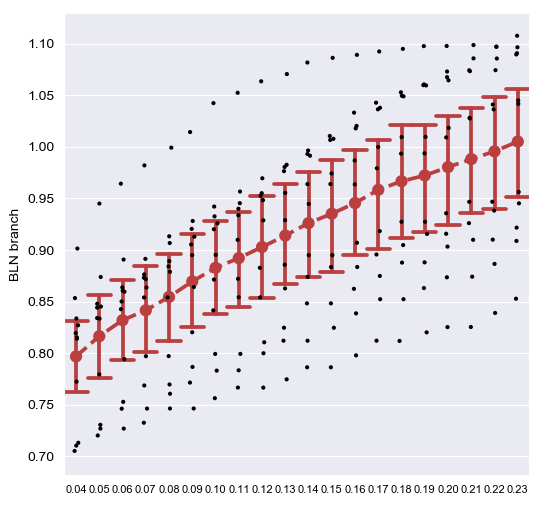

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,0.853334,0.873771,0.890682,0.891338,0.906690,0.920390,0.932520,0.945315,0.954984,0.955248,0.963780,0.974100,0.986667,0.999755,1.009307,1.009537,1.018225,1.027391,1.036196,1.044920
1,0.901358,0.944922,0.964215,0.981910,0.999114,1.014209,1.042247,1.052289,1.063406,1.070414,1.081599,1.086139,1.089033,1.092301,1.094809,1.097509,1.097626,1.098518,1.096905,1.096359
2,0.819398,0.833975,0.850023,0.871715,0.889100,0.905260,0.920022,0.933572,0.948239,0.976300,0.991312,1.006558,1.020179,1.036253,1.048835,1.060387,1.072884,1.085638,1.096984,1.107557
3,0.833552,0.844075,0.859535,0.876287,0.913194,0.928035,0.942037,0.956566,0.969423,0.982509,0.996364,1.010424,1.033049,1.042707,1.052704,1.059710,1.067456,1.074097,1.074179,1.089458
4,0.705215,0.720161,0.746123,0.746267,0.760621,0.771456,0.783044,0.783336,0.799863,0.812036,0.812003,0.824555,0.838542,0.852242,0.852244,0.863066,0.873466,0.874082,0.886457,0.908711
5,0.772373,0.779448,0.794161,0.796980,0.797096,0.820209,0.841387,0.854152,0.854037,0.862700,0.873898,0.883442,0.883468,0.895572,0.904713,0.915511,0.915685,0.925987,0.938091,0.945147
6,0.815149,0.833452,0.842590,0.853945,0.853998,0.863948,0.871261,0.871977,0.882662,0.885644,0.894895,0.894906,0.906975,0.918230,0.927294,0.927224,0.935505,0.946609,0.946704,0.956183
7,0.713124,0.726872,0.726872,0.732532,0.746347,0.746347,0.756333,0.766615,0.766575,0.774607,0.786281,0.786281,0.797831,0.812044,0.811817,0.820087,0.825194,0.825311,0.838949,0.852738
8,0.813988,0.847762,0.860421,0.873058,0.884025,0.912798,0.925787,0.939892,0.952454,0.980398,0.992964,1.007685,1.017794,1.037739,1.049366,1.059408,1.064359,1.073200,1.085484,1.090652
9,0.710374,0.730535,0.752782,0.768651,0.769615,0.786628,0.799210,0.799240,0.810522,0.824596,0.848209,0.848210,0.862305,0.874768,0.887719,0.887944,0.903227,0.909823,0.909968,0.921630


In [67]:
pltfn.boxplot(avdic, 'BLN branch', (6,6), 10, 8, 3, 1)

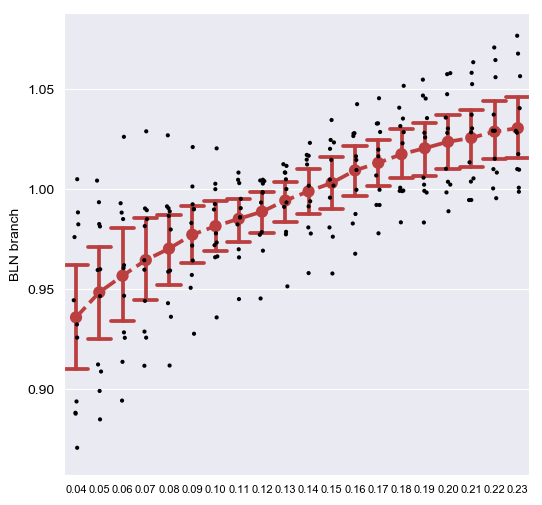

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,0.888338,0.908930,0.928466,0.944205,0.958766,0.971817,0.972012,0.985845,0.998238,1.008348,1.017099,1.024553,1.027931,1.032851,1.035243,1.035463,1.035716,1.037153,1.037214,1.040415
1,0.925879,0.946548,0.946739,0.964490,0.979842,0.992432,0.999983,1.004673,1.004703,1.012448,1.016669,1.023319,1.026523,1.028538,1.028458,1.028134,1.028085,1.028371,1.029155,1.029094
2,0.944515,0.959605,0.962016,0.959765,0.959349,0.964367,0.966418,0.969961,0.969268,0.977425,0.980875,0.980867,0.987589,0.992077,0.999125,0.999152,1.002270,1.005372,1.009987,1.010011
3,0.887901,0.899230,0.913774,0.928868,0.943056,0.957148,0.973330,0.986036,0.998537,1.011601,1.023101,1.034515,1.042426,1.045387,1.051584,1.054672,1.057405,1.063370,1.064448,1.067668
4,0.893981,0.912449,0.925766,0.925837,0.936263,0.950734,0.965979,0.965929,0.977212,0.991136,0.991368,1.004764,1.016409,1.016392,1.031481,1.046715,1.057918,1.058088,1.070730,1.076595
5,0.988394,0.993472,0.992959,0.990357,0.988915,0.983094,0.977907,0.982381,0.978508,0.978697,0.977835,0.976247,0.982848,0.992107,0.999001,1.005734,1.010176,1.013397,1.015160,1.017529
6,0.932439,0.959981,0.960586,0.981555,0.991394,1.001320,1.002686,1.003019,1.004319,1.004916,1.012301,1.014614,1.014560,1.019706,1.022924,1.025860,1.030271,1.030312,1.029181,1.028184
7,1.004951,1.004258,1.026123,1.028867,1.026869,1.021020,1.020355,1.008270,1.002786,1.000036,1.001686,1.001779,1.009546,1.006826,1.000712,0.998292,0.998360,0.994576,0.995471,0.998705
8,0.976054,0.981362,0.985046,0.985033,0.986643,0.990049,0.992546,0.995153,1.004015,1.008188,1.014728,1.020130,1.027746,1.032743,1.040660,1.045237,1.047399,1.052440,1.055893,1.056395
9,0.870853,0.885037,0.894410,0.911802,0.911926,0.927795,0.935944,0.945091,0.945403,0.951449,0.958078,0.957885,0.967745,0.977943,0.983423,0.983343,0.988958,0.994554,1.000358,1.000709


In [68]:
pltfn.boxplot(pavdic, 'BLN branch', (6,6), 10, 8, 3, 1)

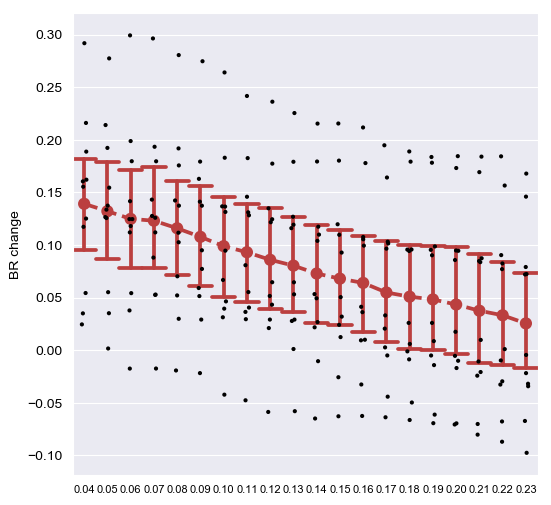

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,0.035005,0.035158,0.037783,0.052867,0.052075,0.051427,0.039492,0.040530,0.043254,0.053100,0.053318,0.050453,0.041264,0.033096,0.025936,0.025926,0.017491,0.009762,0.001018,-0.004505
1,0.024521,0.001625,-0.017475,-0.017420,-0.019272,-0.021777,-0.042264,-0.047616,-0.058703,-0.057967,-0.064930,-0.062819,-0.062510,-0.063763,-0.066351,-0.069375,-0.069542,-0.070147,-0.067750,-0.067265
2,0.125116,0.125630,0.111993,0.088050,0.070249,0.059107,0.046396,0.036389,0.021029,0.001125,-0.010438,-0.025691,-0.032590,-0.044177,-0.049710,-0.061235,-0.070614,-0.080266,-0.086997,-0.097546
3,0.054348,0.055155,0.054239,0.052580,0.029862,0.029113,0.031293,0.029469,0.029114,0.029092,0.026737,0.024091,0.009377,0.002681,-0.001120,-0.005037,-0.010051,-0.010727,-0.009731,-0.021791
4,0.188766,0.192288,0.179643,0.179569,0.175642,0.179278,0.182934,0.182594,0.177349,0.179100,0.179365,0.180209,0.177867,0.164150,0.179237,0.183649,0.184452,0.184006,0.184273,0.167883
5,0.216021,0.214024,0.198798,0.193377,0.191819,0.162886,0.136520,0.128230,0.124471,0.115997,0.103937,0.092805,0.099380,0.096535,0.094288,0.090223,0.094491,0.087410,0.077069,0.072381
6,0.117290,0.126529,0.117996,0.127610,0.137396,0.137371,0.131425,0.131042,0.121656,0.119271,0.117407,0.119708,0.107585,0.101477,0.095630,0.098636,0.094765,0.083704,0.082477,0.072001
7,0.291827,0.277386,0.299252,0.296335,0.280522,0.274673,0.264023,0.241656,0.236210,0.225429,0.215405,0.215497,0.211715,0.194782,0.188895,0.178205,0.173165,0.169264,0.156523,0.145966
8,0.162067,0.133600,0.124625,0.111976,0.102617,0.077250,0.066760,0.055261,0.051560,0.027790,0.021764,0.012445,0.009952,-0.004995,-0.008707,-0.014171,-0.016960,-0.020760,-0.029591,-0.034257
9,0.160479,0.154503,0.141628,0.143151,0.142311,0.141167,0.136733,0.145852,0.134881,0.126852,0.109870,0.109675,0.105440,0.103174,0.095704,0.095399,0.085731,0.084731,0.090390,0.079079


In [69]:
pltfn.boxplot(diffdic, 'BR change', (6,6), 10, 8, 3, 1)

In [75]:
#LLR
ballist, pallist = list(range(20)),list(range(20))
namelist = adfn.name_zero('back', 0.04, 0.23, 0.01)
for i in range(20):
    bnnblist = list(range(11))
    pnnblist = list(range(11))
    for t in range(11):
        bnnblist[t] = bexplist[i][t][0]
        pnnblist[t] = pexplist[i][t][0]
    ballist[i], pallist[i] = bnnblist, pnnblist
avdic, pavdic = {}, {}
for i in range(20):
    avdic[namelist[i]] = ballist[i]
    pavdic[namelist[i]] = pallist[i]

In [77]:
#LLR - p
ballist, pallist = list(range(20)),list(range(20))
namelist = adfn.name_zero('back', 0.04, 0.23, 0.01)
for i in range(20):
    bnnblist = list(range(11))
    pnnblist = list(range(11))
    for t in range(11):
        bnnblist[t] = bexplist[i][t][1]
        pnnblist[t] = pexplist[i][t][1]
    ballist[i], pallist[i] = bnnblist, pnnblist
avdic, pavdic = {}, {}
for i in range(20):
    avdic[namelist[i]] = ballist[i]
    pavdic[namelist[i]] = pallist[i]

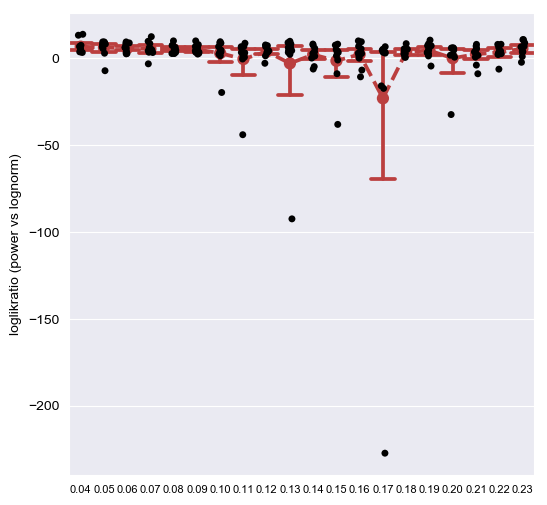

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,7.255803,7.627257,4.062907,4.114595,2.694675,5.137961,2.146142,3.150788,3.386552,4.206883,2.520079,3.760354,1.021108,3.220629,2.216340,2.357103,-32.561121,0.482091,2.407803,3.574799
1,6.406487,8.284070,5.632824,4.207743,6.050114,3.335837,1.235363,0.731886,2.918405,2.061887,2.035447,-38.224191,-0.173573,-17.523686,2.519935,10.223520,1.543640,6.797404,7.770919,10.527512
2,4.091736,8.831541,2.523006,-3.404346,4.376591,5.801081,8.683938,6.644067,7.446564,5.962395,1.031902,1.235856,2.535911,3.280427,2.287433,6.988880,5.644807,2.814368,1.911756,3.370577
3,3.540226,5.352584,2.343050,4.914641,7.150495,6.536926,6.467093,5.779670,3.968992,7.992561,3.576742,-9.083151,-7.003526,-16.091683,NaN,7.072756,NaN,-4.134300,-6.463022,10.483195
4,3.478333,9.205419,5.887054,5.986008,2.555934,2.211117,2.264543,0.439163,3.412642,5.515956,5.524869,4.847748,9.789637,6.445633,8.196317,3.207515,5.813896,5.301440,2.766816,6.744893
5,13.582450,7.358817,8.069686,3.261685,3.276440,4.120489,4.491006,-0.639199,-3.089990,8.761682,-4.995197,NaN,9.287595,NaN,0.316587,-4.681713,NaN,3.477696,5.997423,3.911677
6,6.713705,7.971521,5.670055,12.218493,4.432002,3.287352,-19.871121,2.726994,1.201868,3.177221,-6.407133,3.123600,2.676040,2.765935,0.522508,1.130222,0.415220,1.471129,NaN,-2.513566
7,13.037103,9.202754,9.202754,9.550386,9.796323,9.779341,9.311521,6.450607,6.461734,6.491432,7.334720,7.344505,6.627046,4.983014,4.997882,5.263323,5.392894,5.479857,3.935738,6.385976
8,5.400782,6.365443,8.614452,8.265490,7.373628,2.794756,3.404245,2.952267,3.173908,-92.538245,-0.088727,-1.211046,-10.887745,-227.267599,4.101895,8.138837,4.441544,-9.116670,3.252270,0.829871
9,4.572078,2.700165,6.094302,4.600408,4.758248,7.624254,8.476874,8.447316,7.045055,9.564201,7.964734,7.910322,5.217440,4.411376,5.230714,4.359607,5.683078,7.796540,7.829337,8.667661


In [72]:
pltfn.boxplot(avdic, 'loglikratio (power vs lognorm)', (6,6), 10, 8, 5, 1)

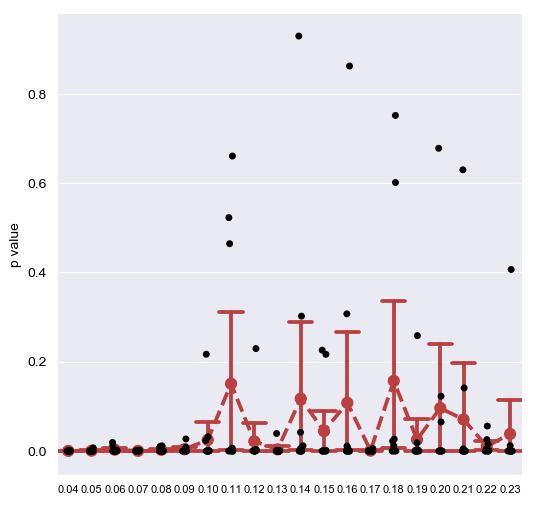

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,3.992846e-13,2.398019e-14,4.846529e-05,3.878593e-05,7.045738e-03,2.777359e-07,3.186166e-02,1.628306e-03,7.077690e-04,2.589174e-05,1.173283e-02,1.696734e-04,3.072035e-01,1.279096e-03,2.666824e-02,1.841811e-02,1.457308e-232,6.297412e-01,1.604884e-02,3.504973e-04
1,1.489108e-10,1.190352e-16,1.772826e-08,2.579344e-05,1.447433e-09,8.504294e-04,2.166953e-01,4.642383e-01,3.518274e-03,3.921849e-02,4.180588e-02,0.000000e+00,8.622010e-01,9.450040e-69,1.173765e-02,1.555859e-24,1.226757e-01,1.065213e-11,7.791888e-15,6.451712e-26
2,4.281557e-05,1.032433e-18,1.163564e-02,6.632278e-04,1.205499e-05,6.588868e-09,3.822976e-18,3.051445e-11,9.580239e-14,2.485678e-09,3.021180e-01,2.165121e-01,1.121552e-02,1.036502e-03,2.217055e-02,2.770900e-12,1.653665e-08,4.887329e-03,5.590745e-02,7.501081e-04
3,3.997844e-04,8.670712e-08,1.912683e-02,8.894540e-07,8.646582e-13,6.279596e-11,9.990613e-11,7.484733e-09,7.217728e-05,1.321644e-15,3.479033e-04,1.054757e-19,2.495989e-12,2.917945e-58,NaN,1.518865e-12,NaN,3.560378e-05,1.026325e-10,1.031974e-25
4,5.045425e-04,3.403402e-20,3.931413e-09,2.150543e-09,1.059031e-02,2.702776e-02,2.354075e-02,6.605434e-01,6.433630e-04,3.468898e-08,3.297324e-08,1.248712e-06,1.247430e-22,1.151191e-10,2.478650e-16,1.338871e-03,6.103524e-09,1.148929e-07,5.660676e-03,1.531402e-11
5,5.089479e-42,1.855473e-13,7.047913e-16,1.107521e-03,1.051247e-03,3.780692e-05,7.088761e-06,5.226936e-01,2.001633e-03,1.923579e-18,5.877578e-07,NaN,1.578141e-20,NaN,7.515572e-01,2.844869e-06,NaN,5.057427e-04,2.004733e-09,9.165737e-05
6,1.897443e-11,1.567338e-15,1.427518e-08,2.476326e-34,9.336194e-06,1.011344e-03,7.236807e-88,6.391419e-03,2.294145e-01,1.486936e-03,1.482814e-10,1.786529e-03,7.449778e-03,5.675986e-03,6.013164e-01,2.583827e-01,6.779805e-01,1.412563e-01,NaN,1.195175e-02
7,7.526238e-39,3.488926e-20,3.488926e-20,1.292145e-21,1.167586e-22,1.381074e-22,1.260143e-20,1.114031e-10,1.035098e-10,8.502420e-11,2.221851e-13,2.065224e-13,3.424702e-11,6.260135e-07,5.796349e-07,1.414750e-07,6.933186e-08,4.256703e-08,8.294126e-05,1.703075e-10
8,6.635107e-08,1.947265e-10,7.027669e-18,1.391227e-16,1.660459e-13,5.193884e-03,6.634717e-04,3.154502e-03,1.504011e-03,0.000000e+00,9.292988e-01,2.258776e-01,1.318648e-27,0.000000e+00,4.097807e-05,3.990941e-16,8.931549e-06,7.746802e-20,1.144874e-03,4.066115e-01
9,4.829112e-06,6.930512e-03,1.099162e-09,4.216638e-06,1.952805e-06,2.454491e-14,2.313247e-17,2.980768e-17,1.853881e-12,1.130711e-21,1.655794e-15,2.567246e-15,1.814133e-07,1.027159e-05,1.688563e-07,1.302960e-05,1.322918e-08,6.362775e-15,4.904493e-15,4.410860e-18


In [74]:
pltfn.boxplot(avdic, 'p value', (6,6), 10, 8, 5, 1)

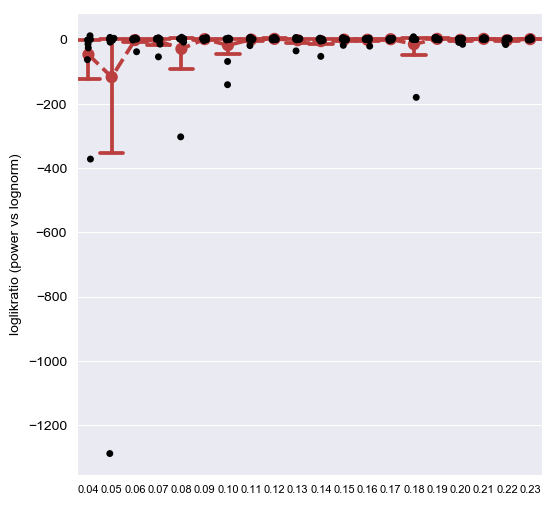

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,NaN,0.140580,2.578001,1.557560,3.556512,1.779321,1.518492,0.633307,4.412380,6.751933,-1.440969,-0.593421,1.794345,1.996560,0.599684,2.471559,2.898261,0.472388,-0.005980,2.958414
1,12.326359,7.166971,5.184086,-13.770910,4.966613,-2.800682,-67.682255,1.662655,-0.625110,-0.431359,0.989074,0.877993,1.284278,0.721864,1.091355,1.561696,-8.084170,2.778047,-15.099170,-0.738844
2,-1.471762,4.348347,2.139170,4.132596,3.013429,0.796021,1.600770,1.887537,6.403331,1.657579,0.562781,1.418993,1.107401,-0.727849,3.727647,3.929039,1.812315,4.811777,1.530170,1.604032
3,-13.842191,1.036855,2.013718,5.582309,0.723758,1.243744,3.240190,5.001926,3.277970,2.260046,1.461190,0.770769,0.934322,-0.099665,1.569716,1.281543,0.797760,0.444751,-10.691198,0.971789
4,-2.042744,-1288.163735,3.214512,1.774971,-7.632107,1.557803,2.373358,-18.415529,2.114120,0.488581,-2.760306,3.194141,2.167320,2.139481,1.983061,0.320739,-1.202702,0.777875,-1.207578,0.496213
5,-25.325935,0.987141,3.164793,3.986751,2.818466,0.517438,-140.052857,1.559297,0.967008,3.204735,-4.478864,-17.566647,-20.085451,1.117749,1.191742,-0.479623,-14.311065,1.575878,-2.063531,2.670618
6,0.865170,1.511939,-37.457031,1.950272,2.281672,0.907752,5.116490,4.600627,0.521123,1.472747,2.271199,2.333670,1.862372,4.086226,1.284477,2.307471,3.656566,3.657549,4.402377,6.796148
7,-0.606089,0.631711,2.498270,4.747384,7.542266,2.921801,2.675697,7.379327,6.714772,NaN,4.857674,4.349145,2.454496,-2.648041,-179.411874,1.444608,2.030235,1.143351,1.256037,1.668608
8,-62.083291,1.602102,-1.012070,2.018238,-302.397834,2.278379,-0.833121,-2.080690,1.815552,-34.827732,-51.843905,1.072341,3.047155,4.205930,9.120161,7.204445,3.059432,6.387223,3.782798,-0.457724
9,-371.565987,-1.418504,3.984430,-53.330034,NaN,3.562579,0.820512,1.223126,0.649424,0.859532,1.030730,1.068421,-0.368093,2.028733,2.355823,2.376095,2.632564,3.365446,1.432657,1.430590


In [76]:
pltfn.boxplot(pavdic, 'loglikratio (power vs lognorm)', (6,6), 10, 8, 5, 1)

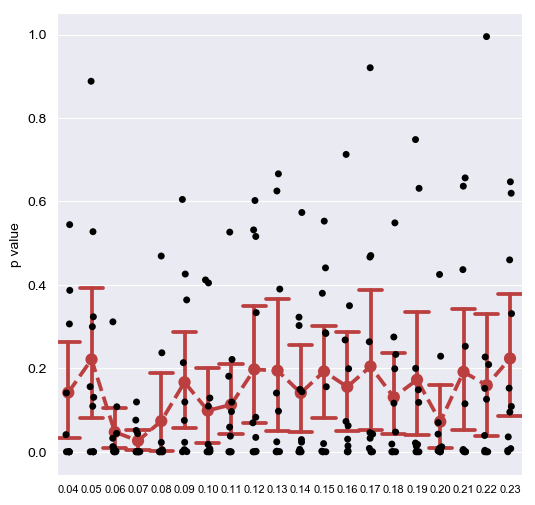

,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,NaN,8.882018e-01,9.937375e-03,1.193376e-01,3.758120e-04,7.518720e-02,1.288905e-01,5.265332e-01,1.022404e-05,1.458885e-11,0.149593,5.528993e-01,7.275814e-02,0.045873,5.487169e-01,1.345254e-02,3.752378e-03,6.366497e-01,9.952290e-01,3.092268e-03
1,6.533260e-35,7.667533e-13,2.170762e-07,3.813806e-43,6.813253e-07,5.099480e-03,0.000000e+00,9.638152e-02,5.318990e-01,6.662071e-01,0.322627,3.799477e-01,1.990448e-01,0.470378,2.751168e-01,1.183597e-01,6.258879e-16,5.468676e-03,1.639857e-51,4.600019e-01
2,1.410850e-01,1.371673e-05,3.242191e-02,3.586887e-05,2.583138e-03,4.260200e-01,1.094279e-01,5.908818e-02,1.520236e-10,9.740254e-02,0.573584,1.559009e-01,2.681208e-01,0.466706,1.932759e-04,8.528610e-05,6.993747e-02,1.495939e-06,1.259747e-01,1.087070e-01
3,1.418171e-43,2.998034e-01,4.403912e-02,2.373459e-08,4.692141e-01,2.135938e-01,1.194500e-03,5.676032e-07,1.045565e-03,2.381837e-02,0.143963,4.408438e-01,3.501381e-01,0.920610,1.164812e-01,2.000031e-01,4.250099e-01,6.564997e-01,1.119154e-26,3.311554e-01
4,4.107781e-02,0.000000e+00,1.306664e-03,7.590260e-02,2.309481e-14,1.192798e-01,1.762719e-02,9.862055e-76,3.450502e-02,6.251385e-01,0.005775,1.402474e-03,3.021047e-02,0.032397,4.736062e-02,7.484085e-01,2.290916e-01,4.366429e-01,2.272096e-01,6.197439e-01
5,1.655040e-141,3.235733e-01,1.551932e-03,6.698438e-05,4.825366e-03,6.048501e-01,0.000000e+00,1.189262e-01,3.335400e-01,1.351869e-03,0.000008,4.436268e-69,9.892075e-90,0.263674,2.333626e-01,6.314957e-01,1.866319e-46,1.150538e-01,3.906221e-02,7.571185e-03
6,3.869457e-01,1.305494e-01,4.615173e-307,5.114376e-02,2.250869e-02,3.640091e-01,3.112738e-07,4.212215e-06,6.022811e-01,1.408192e-01,0.023135,1.961303e-02,6.255067e-02,0.000044,1.989750e-01,2.102855e-02,2.556168e-04,2.546386e-04,1.070711e-05,1.074532e-11
7,5.444555e-01,5.275756e-01,1.248011e-02,2.060642e-06,4.618729e-14,3.480139e-03,7.457394e-03,1.590916e-13,1.883602e-11,NaN,0.000001,1.366694e-05,1.410823e-02,0.008096,0.000000e+00,1.485680e-01,4.233269e-02,2.528930e-01,2.091026e-01,9.519508e-02
8,0.000000e+00,1.091330e-01,3.115044e-01,4.356643e-02,0.000000e+00,2.270399e-02,4.047766e-01,3.746231e-02,6.943908e-02,9.254799e-266,0.000000,2.835668e-01,2.310183e-03,0.000026,7.501283e-20,5.828055e-13,2.217575e-03,1.689255e-10,1.550752e-04,6.471511e-01
9,0.000000e+00,1.560435e-01,6.764240e-05,0.000000e+00,NaN,3.672293e-04,4.119241e-01,2.212822e-01,5.160641e-01,3.900473e-01,0.302667,2.853307e-01,7.128037e-01,0.042486,1.848171e-02,1.749694e-02,8.474310e-03,7.642016e-04,1.519558e-01,1.525479e-01


In [78]:
pltfn.boxplot(pavdic, 'p value', (6,6), 10, 8, 5, 1)